# Problem Statement
To predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

    0 represents no heart disease present

	1 represents heart disease present


# Task 1 - Prepare a complete data analysis report on the given data.

In [2403]:
#import all the necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2405]:
#Load the Data
data = pd.read_csv('values.csv')

In [2407]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [2409]:
# Drop the Patient_ID column since it is not usefull in the analysis process
data.drop(columns = 'patient_id', axis=1 , inplace=True)
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [2411]:
# Since Thal feature has object datatype and it has 2 values normal and reversible_defect
# We will assign Normal = 0 and reversible_defect = 1 and update the values permanently

thal_mapping = {'normal': 0, 'reversible_defect': 1}
data['thal'] = data['thal'].map(thal_mapping)

data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0.0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0.0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0.0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1.0,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1.0,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,1.0,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,0.0,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,1.0,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0.0,124,3,2,1,0,255,0.0,1,48,175,0,0


In [2413]:
data['slope_of_peak_exercise_st_segment'].unique()

array([1, 2, 3], dtype=int64)

In [2415]:
data['thal'].unique()

array([ 0.,  1., nan])

In [2417]:
data = data.dropna(subset=['thal'])

In [2419]:
data['thal'].unique()

array([0., 1.])

In [2421]:
# Calculate the mode of the 'thal' column
#thal_mode = data['thal'].mode()[0]

# Replace NaN values with the mode
#data['thal'].fillna(thal_mode, inplace=True)

In [2423]:
data['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 178, 130, 150, 170, 120, 140, 138, 144, 136,
       160, 108, 106, 156, 180, 112, 122, 124, 135, 105, 115, 126, 172,
       145, 118, 134, 100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [2425]:
data['chest_pain_type'].unique()

array([2, 3, 4, 1], dtype=int64)

In [2427]:
data['num_major_vessels'].unique()

array([0, 3, 2, 1], dtype=int64)

In [2429]:
data['fasting_blood_sugar_gt_120_mg_per_dl'].unique()

array([0, 1], dtype=int64)

In [2431]:
data['resting_ekg_results'].unique()

array([2, 0, 1], dtype=int64)

In [2433]:
data['serum_cholesterol_mg_per_dl'].unique()

array([308, 214, 304, 223, 270, 180, 258, 326, 219, 302, 226, 335, 236,
       231, 200, 234, 253, 204, 319, 233, 245, 211, 303, 205, 185, 175,
       225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252, 265, 417,
       267, 261, 149, 281, 311, 315, 330, 239, 295, 197, 564, 305, 283,
       160, 254, 282, 322, 250, 188, 220, 199, 215, 228, 196, 266, 229,
       259, 256, 268, 177, 168, 262, 271, 299, 293, 141, 277, 321, 294,
       313, 232, 289, 213, 274, 263, 244, 298, 172, 353, 210, 246, 286,
       360, 174, 227, 248, 224, 300, 235, 217, 193, 167, 216, 195, 309,
       273, 198, 290, 275, 206, 164, 207, 249, 212, 327, 201], dtype=int64)

In [2435]:
data['oldpeak_eq_st_depression'].unique()

array([0. , 1.6, 4.2, 2.6, 3.4, 0.4, 0.2, 3.8, 0.9, 0.6, 1.4, 0.1, 0.3,
       1.5, 3. , 2. , 1. , 3.1, 2.5, 0.8, 2.4, 1.8, 1.9, 2.8, 1.2, 0.5,
       2.2, 1.3, 1.1, 0.7, 3.2, 5.6, 6.2])

In [2437]:
data['max_heart_rate_achieved'].unique()

array([170, 158, 162, 181, 145, 150, 157, 140, 151, 178, 152, 182, 126,
       175, 144, 202, 147, 142, 143, 115, 159, 184, 155, 123, 168, 114,
       154, 165, 186, 173, 163, 121, 161, 137, 172, 130, 167, 141, 166,
       125, 103, 120, 132, 169, 179,  99, 177, 160, 138, 156, 109, 139,
       113, 149, 174, 131, 148, 153, 133, 122, 105, 106, 192, 108,  96,
       171, 180, 188, 111,  97, 117], dtype=int64)

In [2439]:
data['exercise_induced_angina'].unique()

array([0, 1], dtype=int64)

In [2441]:
data['heart_disease_present'].unique()

array([0, 1], dtype=int64)

# Domain Analysis

### Input Data

Thanllium Stress level is the Categorical Type of Data

oldpeak_eq_st_depression is float and rest of all the columns are int type

### Target Data

It has to be in the binary format

### Basic Checks

1. Shape
2. Head
3. Tail
4. Columns
5. Dtypes
6. Describe
7. Info

In [2445]:
# Shape
data.shape

(172, 14)

In [2447]:
# Head
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0.0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0.0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0.0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1.0,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1.0,178,1,0,0,2,270,4.2,1,59,145,0,0


In [2449]:
# Tail
data.tail()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
175,2,1.0,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,0.0,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,1.0,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,0.0,124,3,2,1,0,255,0.0,1,48,175,0,0
179,1,0.0,160,3,1,0,0,201,0.0,0,54,163,0,0


In [2451]:
# columns
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [2453]:
# dtypes
data.dtypes

slope_of_peak_exercise_st_segment         int64
thal                                    float64
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [2455]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     172 non-null    int64  
 1   thal                                  172 non-null    float64
 2   resting_blood_pressure                172 non-null    int64  
 3   chest_pain_type                       172 non-null    int64  
 4   num_major_vessels                     172 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  172 non-null    int64  
 6   resting_ekg_results                   172 non-null    int64  
 7   serum_cholesterol_mg_per_dl           172 non-null    int64  
 8   oldpeak_eq_st_depression              172 non-null    float64
 9   sex                                   172 non-null    int64  
 10  age                                   172 non-null    int64  
 11  max_heart_rate_achieved 

In [2457]:
# Describe
#data.describe(include=['object'])
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1.529070,0.430233,130.843023,3.156977,0.697674,0.151163,1.040698,250.232558,0.996512,0.674419,54.668605,150.110465,0.319767,0.441860
std,0.615847,0.496554,17.115152,0.932712,0.980151,0.359253,0.999167,53.423755,1.128052,0.469960,9.396438,22.245691,0.467748,0.498058
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,214.000000,0.000000,0.000000,48.000000,132.750000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,247.000000,0.800000,1.000000,55.000000,153.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,282.000000,1.600000,1.000000,62.000000,168.000000,1.000000,1.000000
max,3.000000,1.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


# EDA - Exploratory Data Analysis

1. Univariate

2. Bivariate

3. Multivariate

### Univariate analsyis - analyse the single column
cat / descrete - countplot

continuous -> histogram / boxboxtplot

In [2461]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

<Axes: xlabel='heart_disease_present', ylabel='count'>

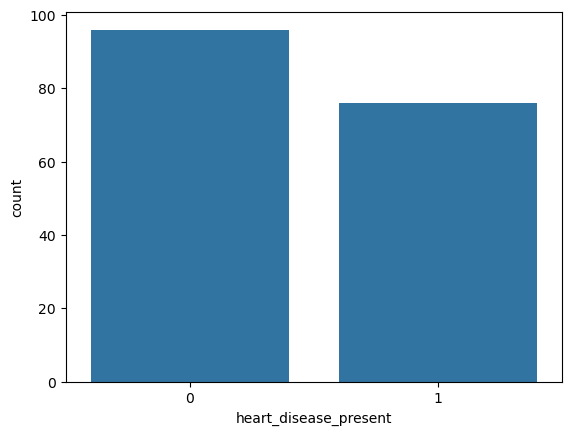

In [2463]:
# target column - Count plot to see the number of occurances
sns.countplot(x=data['heart_disease_present'])

Insight - Occurances of 0 are more than 1

In [2466]:
data['slope_of_peak_exercise_st_segment'].unique()

array([1, 2, 3], dtype=int64)

<Axes: xlabel='slope_of_peak_exercise_st_segment', ylabel='count'>

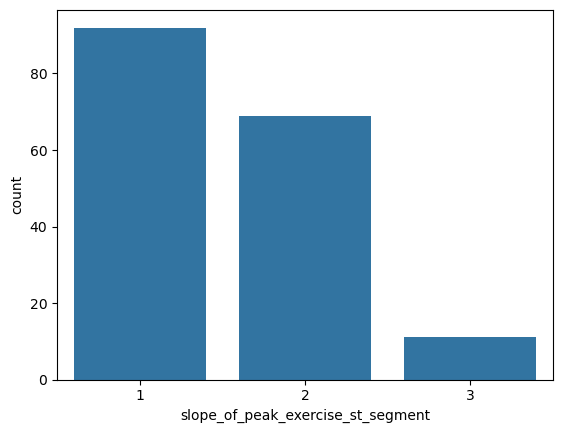

In [2468]:
sns.countplot(x=data['slope_of_peak_exercise_st_segment'])

In [2470]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

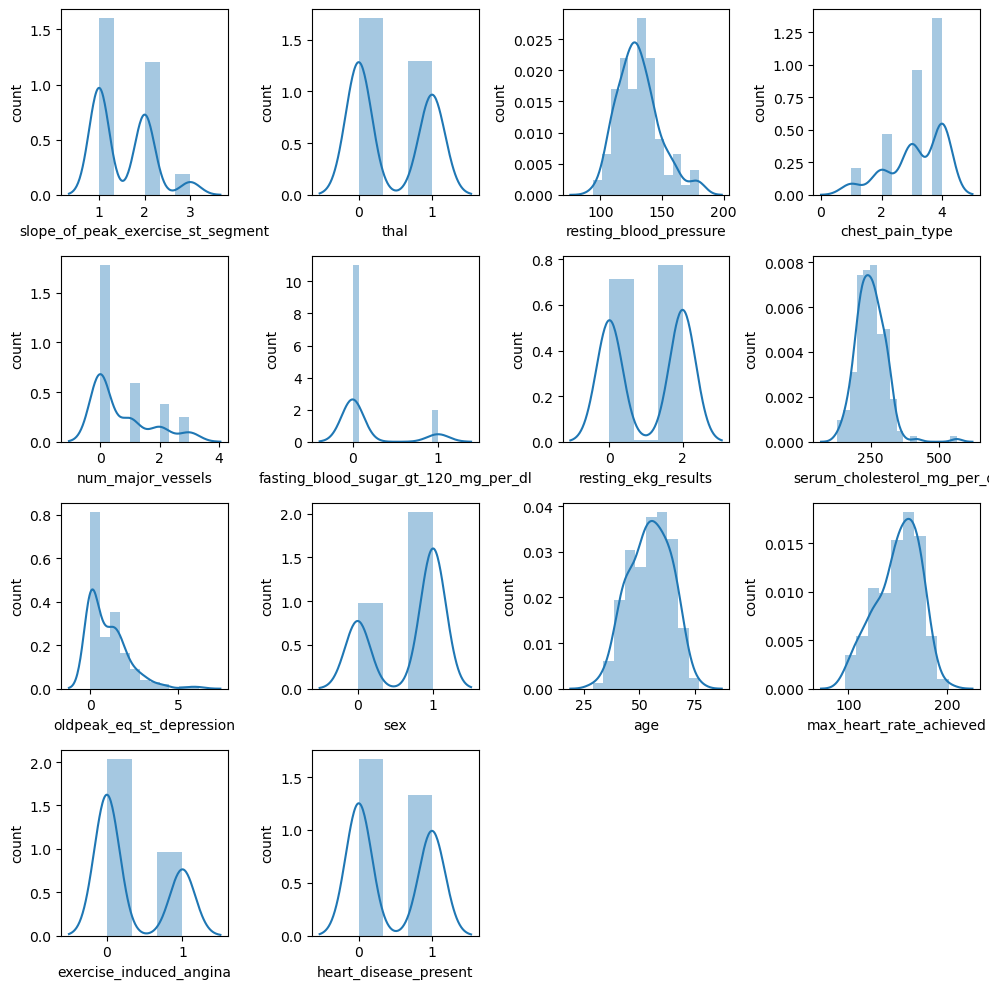

In [2472]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1


for i in data:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()


### Bivarite - 2 col analysis

num vs num  -> scatter, line, rel, hist (hue)

 num vs cat   -> count(hue), bar, box (hue)

<Axes: xlabel='slope_of_peak_exercise_st_segment', ylabel='count'>

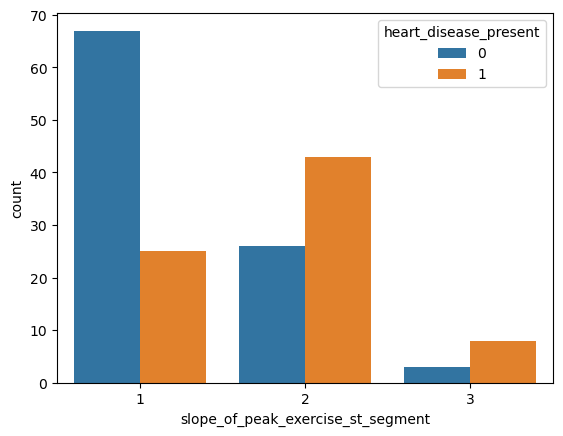

In [2475]:
# analyse all the input varibales vs target
sns.countplot(x=data['slope_of_peak_exercise_st_segment'],hue=data['heart_disease_present'])

Insight - As the Slope_of_peak_exercise_st_segment increases there is decrease in Heart disease

<Axes: xlabel='slope_of_peak_exercise_st_segment', ylabel='Count'>

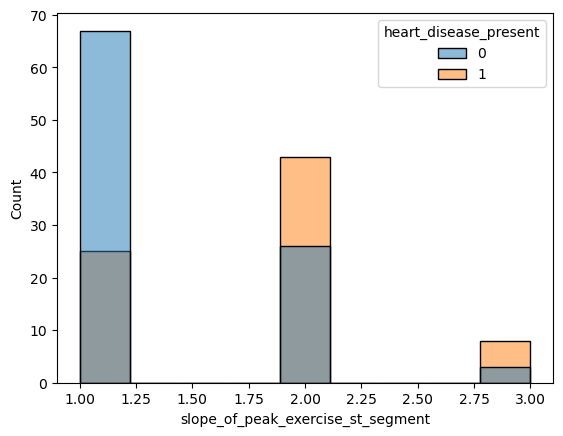

In [2478]:
# continuous input vs descrete target/ categorical  - histogram with hue
sns.histplot(x=data['slope_of_peak_exercise_st_segment'],hue=data['heart_disease_present'])

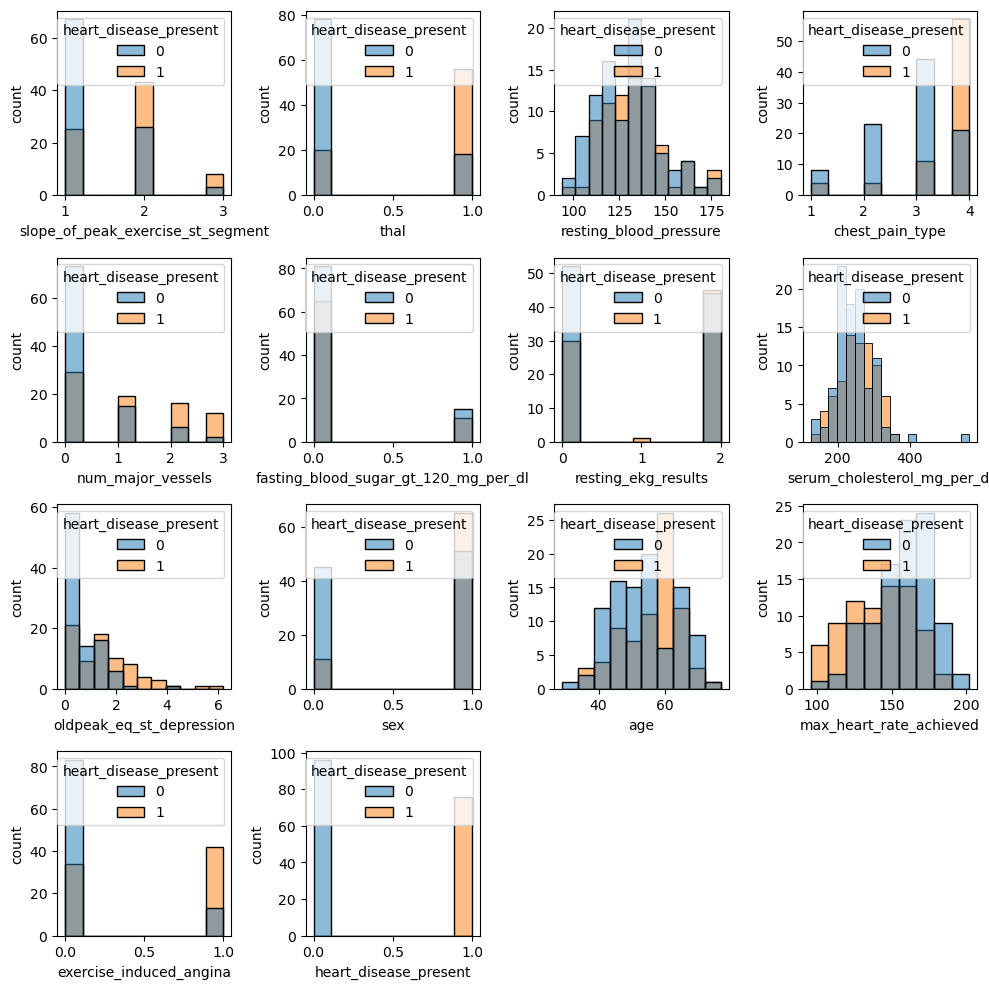

In [2480]:
plt.figure(figsize=(10,10))
plotnumber = 1


for i in data:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data[i],hue=data['heart_disease_present'])
        plt.xlabel(i)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

### Multivariate Analysis

Pairplot

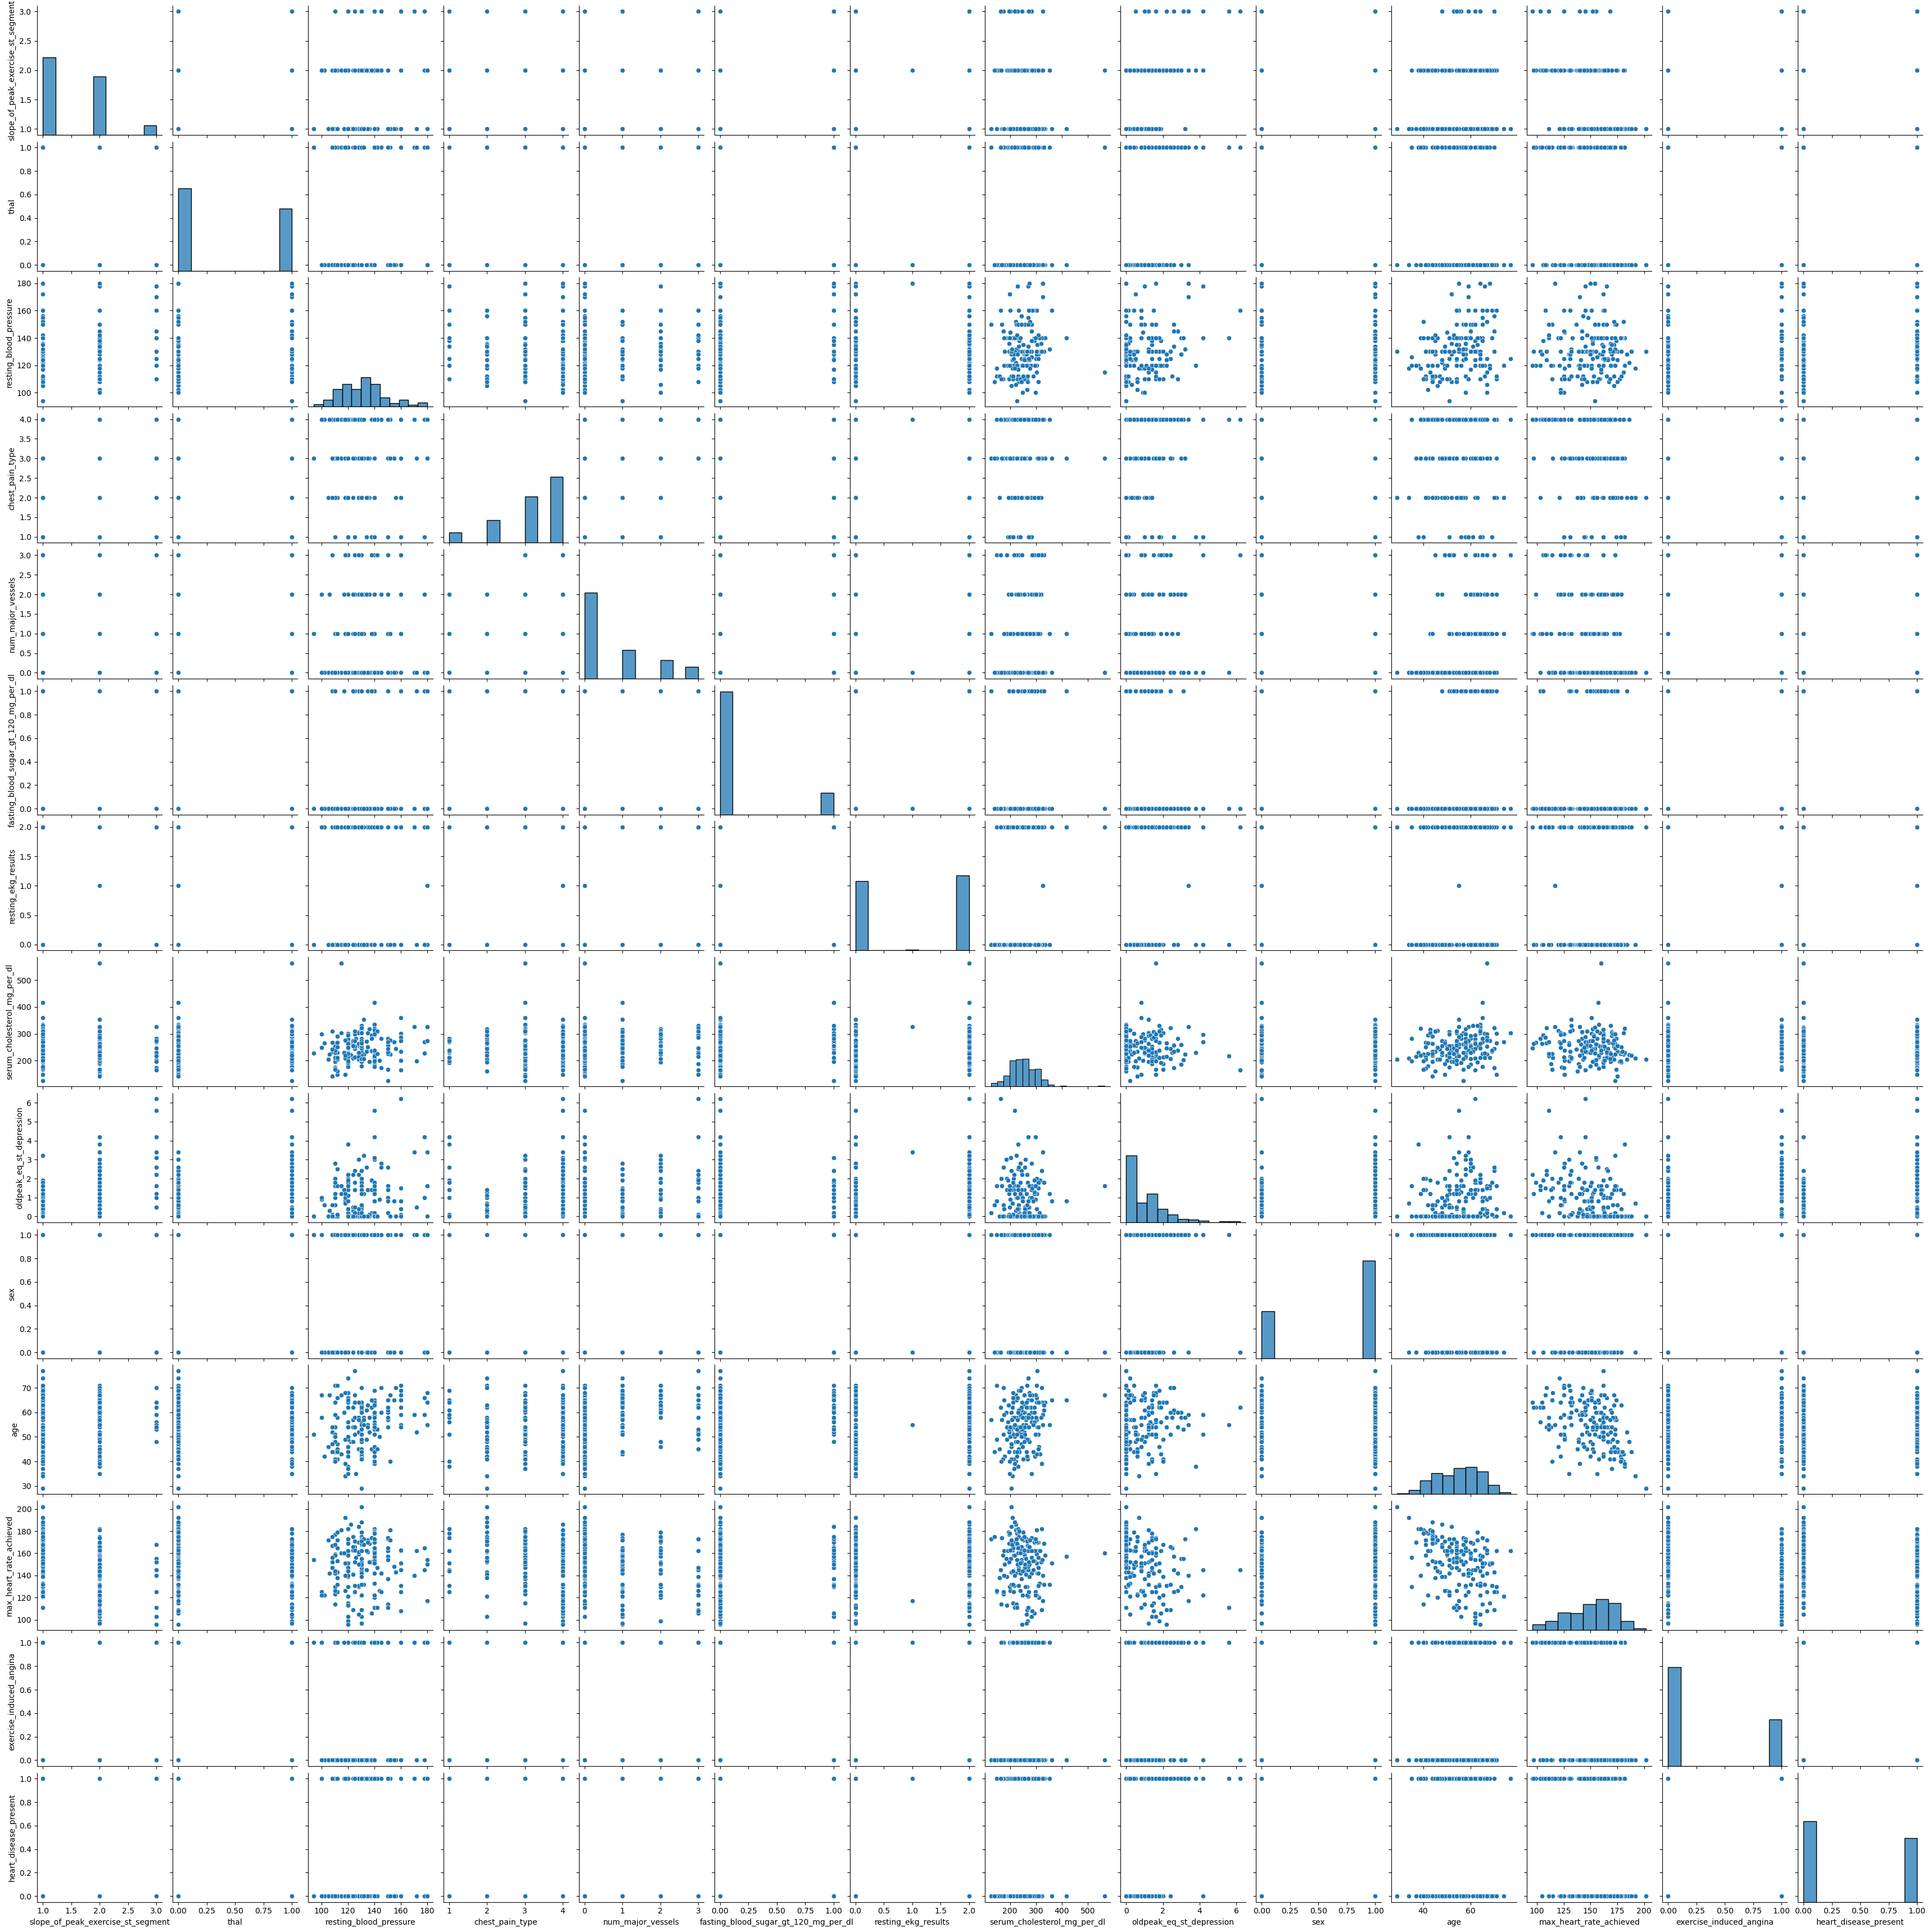

In [2483]:
sns.pairplot(data)

# Preprocessing 

In [2486]:
# check for null values
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [2488]:
# check for duplicates
data.duplicated().sum()

0

In [2490]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0.0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0.0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0.0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1.0,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1.0,178,1,0,0,2,270,4.2,1,59,145,0,0


In [2492]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [2494]:
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,1.529070,0.430233,130.843023,3.156977,0.697674,0.151163,1.040698,250.232558,0.996512,0.674419,54.668605,150.110465,0.319767,0.441860
std,0.615847,0.496554,17.115152,0.932712,0.980151,0.359253,0.999167,53.423755,1.128052,0.469960,9.396438,22.245691,0.467748,0.498058
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,214.000000,0.000000,0.000000,48.000000,132.750000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,247.000000,0.800000,1.000000,55.000000,153.000000,0.000000,0.000000
75%,2.000000,1.000000,140.000000,4.000000,1.000000,0.000000,2.000000,282.000000,1.600000,1.000000,62.000000,168.000000,1.000000,1.000000
max,3.000000,1.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


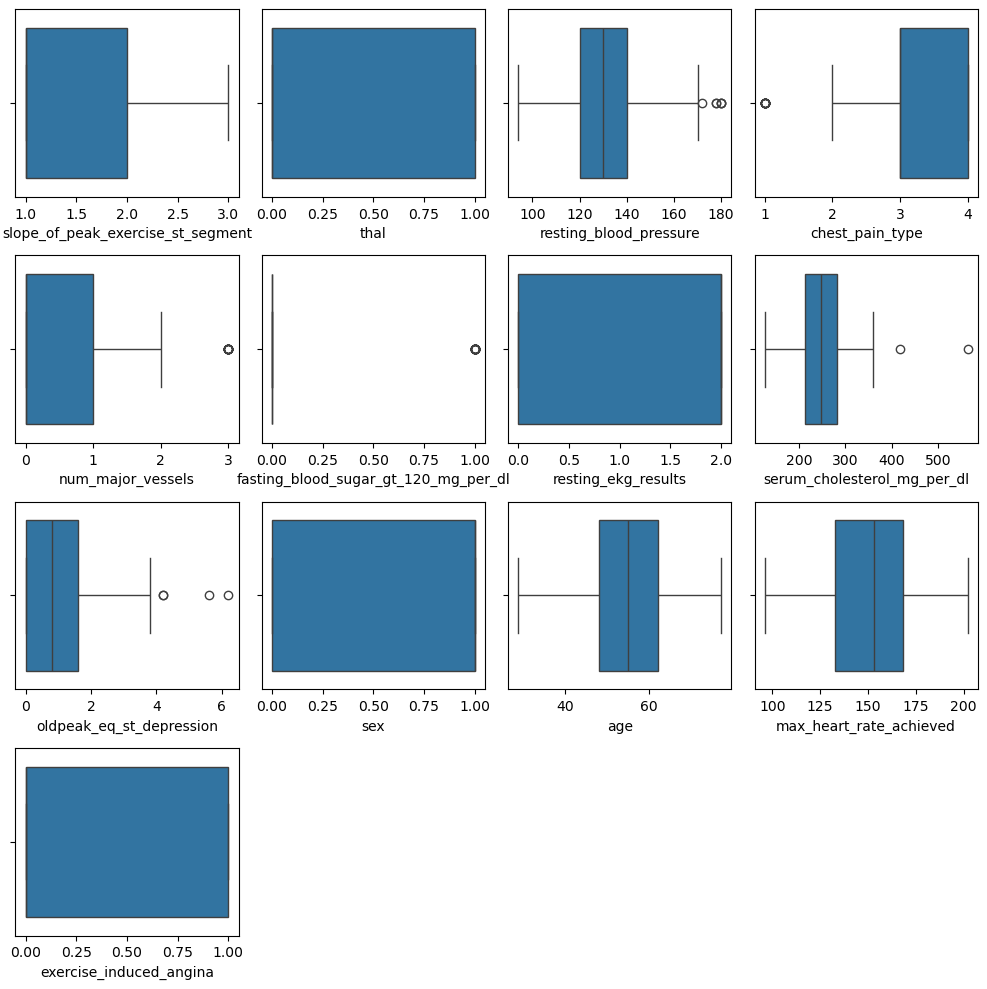

In [2496]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop('heart_disease_present',axis=1):
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [2497]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

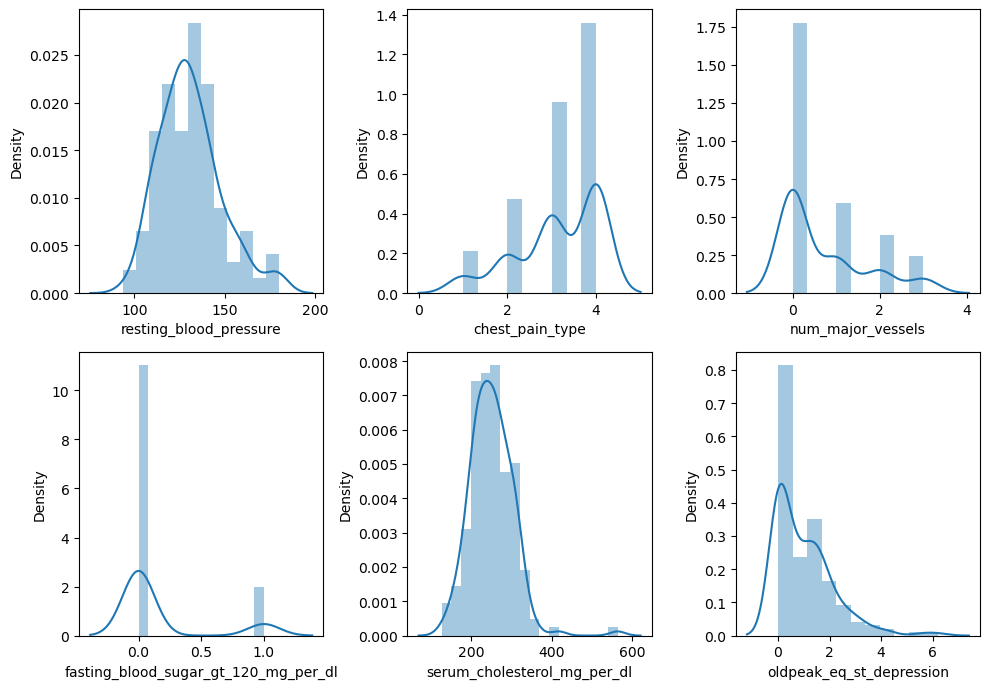

In [2500]:
#SUBPLOT
plt.figure(figsize=(10,10))
plotnumber = 1

for i in data.drop(columns=['heart_disease_present','slope_of_peak_exercise_st_segment','thal','resting_ekg_results','sex','age','max_heart_rate_achieved','exercise_induced_angina'],axis=1):
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=data[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

In [2501]:
# all the above columns are giving us the skewed distribution, hence we are handling outliers by
# IQR method
# q1
# q3
# iqr
# lower_limit -> q1 - 1.5 * iqr
# upper_upper -> q3 + 1.5 * iqr

# resting_blood_pressure - handling outliers
q1 = data['resting_blood_pressure'].quantile(0.25)
q1


120.0

In [2504]:
q3 = data['resting_blood_pressure'].quantile(0.75)
q3

140.0

In [2506]:
iqr = q3 - q1
iqr

20.0

In [2508]:
lower = q1 - 1.5 * iqr
lower

90.0

In [2510]:
upper = q3 + 1.5 * iqr
upper

170.0

In [2512]:
data.loc[data['resting_blood_pressure']<lower]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [2514]:
data.loc[data['resting_blood_pressure']>upper]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,1.0,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,0.0,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,1.0,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,1.0,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,1.0,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,0.0,180,4,0,0,1,327,3.4,0,55,117,1,1


In [2516]:
# before we replace the values, we need to get to know the % of outlier
# if % of outliers < 5 or 6 , we'll handle 
len(data.loc[data['resting_blood_pressure']>upper])

6

In [2518]:
len(data)

172

In [2520]:
(len(data.loc[data['resting_blood_pressure']>upper])/len(data))*100

3.488372093023256

In [2522]:
data.loc[data['resting_blood_pressure']>upper,'resting_blood_pressure']  = data['resting_blood_pressure'].median() 

In [2524]:
data.loc[data['resting_blood_pressure']>upper]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [2526]:
data['resting_blood_pressure'].unique()

array([128, 110, 125, 152, 130, 150, 170, 120, 140, 138, 144, 136, 160,
       108, 106, 156, 112, 122, 124, 135, 105, 115, 126, 145, 118, 134,
       100, 155, 132, 102,  94, 117, 142], dtype=int64)

In [2528]:
# serum_cholesterol_mg_per_dl - handling outliers
q1 = data['serum_cholesterol_mg_per_dl'].quantile(0.25)
q1

214.0

In [2530]:
q3 = data['serum_cholesterol_mg_per_dl'].quantile(0.75)
q3


282.0

In [2532]:
iqr = q3 - q1
iqr

68.0

In [2534]:
lower = q1 - 1.5 * iqr
lower

112.0

In [2536]:
upper = q3 + 1.5 * iqr
upper

384.0

In [2538]:
data.loc[data['serum_cholesterol_mg_per_dl']<lower]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [2540]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,0.0,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,1.0,115,3,0,0,2,564,1.6,0,67,160,0,0


In [2542]:
# before we replace the values, we need to get to know the % of outlier
# if % of outliers < 5 or 6 , we'll handle 

len(data.loc[data['serum_cholesterol_mg_per_dl']>upper])

2

In [2544]:
len(data)

172

In [2546]:
(len(data.loc[data['serum_cholesterol_mg_per_dl']>upper])/len(data))*100

1.1627906976744187

In [2548]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper,'serum_cholesterol_mg_per_dl']  = data['serum_cholesterol_mg_per_dl'].median() 

In [2550]:
data.loc[data['serum_cholesterol_mg_per_dl']>upper]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [2552]:
data['serum_cholesterol_mg_per_dl'].unique()

array([308, 214, 304, 223, 270, 180, 258, 326, 219, 302, 226, 335, 236,
       231, 200, 234, 253, 204, 319, 233, 245, 211, 303, 205, 185, 175,
       225, 203, 325, 230, 222, 126, 209, 269, 255, 243, 252, 265, 247,
       267, 261, 149, 281, 311, 315, 330, 239, 295, 197, 305, 283, 160,
       254, 282, 322, 250, 188, 220, 199, 215, 228, 196, 266, 229, 259,
       256, 268, 177, 168, 262, 271, 299, 293, 141, 277, 321, 294, 313,
       232, 289, 213, 274, 263, 244, 298, 172, 353, 210, 246, 286, 360,
       174, 227, 248, 224, 300, 235, 217, 193, 167, 216, 195, 309, 273,
       198, 290, 275, 206, 164, 207, 249, 212, 327, 201], dtype=int64)

In [2554]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [2556]:
# chest_pain_type - handling outliers
# we are not handling tthe outliers because the data is Categorical

In [2558]:
# fasting_blood_sugar_gt_120_mg_per_dl - handling outliers
# we are not handling the outliers since the data is categorical

In [2560]:
# num_major_vessels - handling outliers
# We are not handling the outliers because the data is Categorical

In [2562]:
# oldpeak_eq_st_depression - handling outliers
# We are not handling the outliers because the data is categorical

# Scaling

### scaling - applied continuous numerical col
### min max - > in the range of 0 1

In [2565]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [2567]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,0.0,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,0.0,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,0.0,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,1.0,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,1.0,130,1,0,0,2,270,4.2,1,59,145,0,0


In [2569]:
continuous_cols = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'age', 'max_heart_rate_achieved']
categorical_cols = ['slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'sex', 'exercise_induced_angina', 'oldpeak_eq_st_depression', 'heart_disease_present']

In [2571]:
# Scale the continuous columns
scaled_continuous = sc.fit_transform(data[continuous_cols])

In [2573]:
# Convert the scaled array back to a DataFrame
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=continuous_cols)

In [2575]:
# Verify the scaled data
scaled_continuous_df.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,age,max_heart_rate_achieved
0,0.447368,0.777778,0.333333,0.698113
1,0.210526,0.376068,0.520833,0.584906
2,0.407895,0.760684,1.000000,0.622642
3,0.763158,0.414530,0.229167,0.801887
4,0.473684,0.615385,0.625000,0.462264


In [2577]:
# Ensure categorical data is selected properly
categorical_df = data[categorical_cols]

In [2579]:
# Reset indices to ensure alignment
scaled_continuous_df.reset_index(drop=True, inplace=True)
categorical_df.reset_index(drop=True, inplace=True)

In [2581]:
# Concatenate the scaled continuous data with the categorical data
new_data = pd.concat([scaled_continuous_df, categorical_df], axis=1)

In [2583]:
new_data.head()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,oldpeak_eq_st_depression,heart_disease_present
0,0.447368,0.777778,0.333333,0.698113,1,0.0,2,0,0,2,1,0,0.0,0
1,0.210526,0.376068,0.520833,0.584906,2,0.0,3,0,0,0,0,0,1.6,0
2,0.407895,0.760684,1.000000,0.622642,1,0.0,4,3,0,2,1,1,0.0,1
3,0.763158,0.414530,0.229167,0.801887,1,1.0,4,0,0,0,1,0,0.0,1
4,0.473684,0.615385,0.625000,0.462264,3,1.0,1,0,0,2,1,0,4.2,0


In [2585]:
new_data.tail()

,resting_blood_pressure,serum_cholesterol_mg_per_dl,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,oldpeak_eq_st_depression,heart_disease_present
167,0.407895,0.547009,0.791667,0.632075,2,1.0,4,2,1,0,1,0,0.2,1
168,0.473684,0.858974,0.541667,0.198113,2,0.0,4,0,0,1,0,1,3.4,1
169,0.407895,0.782051,0.729167,0.330189,2,1.0,3,0,0,0,1,1,1.8,1
170,0.394737,0.551282,0.395833,0.745283,1,0.0,3,2,1,0,1,0,0.0,0
171,0.868421,0.320513,0.520833,0.632075,1,0.0,3,1,0,0,0,0,0.0,0


In [2587]:
new_data.isnull().sum()

resting_blood_pressure                  0
serum_cholesterol_mg_per_dl             0
age                                     0
max_heart_rate_achieved                 0
slope_of_peak_exercise_st_segment       0
thal                                    0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
sex                                     0
exercise_induced_angina                 0
oldpeak_eq_st_depression                0
heart_disease_present                   0
dtype: int64

# Feature selection

<Axes: >

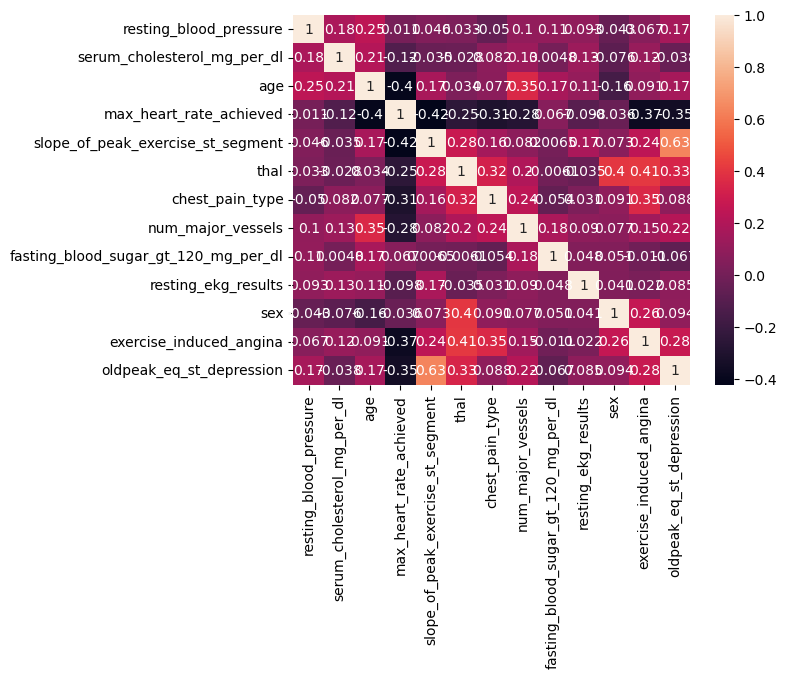

In [2590]:
# drop the irrlevant columns
# co relation of data
sns.heatmap(new_data.drop('heart_disease_present',axis=1).corr(),annot=True)

### Insight - no two input columns show corelation higher 80% so we are selecting all the columns

## Task 2:- Create a model predicting potential Heart Diseases in people using ML  algorithms.

# Model Building - Logistic Regression

In [2594]:
#split the data into input and target
x = new_data.drop('heart_disease_present',axis=1)
y = new_data[['heart_disease_present']]

In [2596]:
# split the entire data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.30,random_state=2)

In [2598]:
# apply the logistic Regression

#import the algo
from sklearn.linear_model import LogisticRegression

# init
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

LogisticRegression()

In [2600]:
# test the model with new records
# x_test
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

# Evaluate the model

In [2603]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

In [2605]:
# Confusion_matrix - Provides a summary of correct and incorrect predictions
confusion_matrix(y_test,y_pred)

array([[27,  2],
       [ 4, 19]], dtype=int64)

In [2607]:
# accuracy score - Proportion of correct predictions
accuracy_score(y_test,y_pred)

0.8846153846153846

In [2609]:
# Precision_score - Proportion of correctly predicted positive cases among all predicted positives
precision_score(y_test,y_pred)

0.9047619047619048

In [2611]:
# recall_score - Proportion of correctly predicted positive cases among all actual positives
recall_score(y_test,y_pred)

0.8260869565217391

In [2613]:
# f1_score - Harmonic mean of precision and recall.
f1_score(y_test,y_pred)

0.8636363636363636

In [2615]:
# classification_report - Detailed precision, recall, and F1 score for each class.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.90      0.83      0.86        23

    accuracy                           0.88        52
   macro avg       0.89      0.88      0.88        52
weighted avg       0.89      0.88      0.88        52



In [2654]:
# ROC Curve and AUC
# Evaluates the model's ability to discriminate between classes, with AUC providing a single metric of performance.

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate , thresholds = roc_curve(y_test,y_pred)
auc_score = auc(false_positive_rate, true_positive_rate)
auc_score


0.87856071964018

### Insight - Logistic Regression: Overall accuracy of the model is 88%

# Model Buillding - Decision Tree

In [2762]:
from sklearn.tree import DecisionTreeClassifier

In [2764]:
# Initialize the model
dt_model = DecisionTreeClassifier()

In [2766]:
# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [2768]:
# Predict on the test data
dt_pred = dt_model.predict(x_test)

# Evaluate the model

In [2771]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2773]:
# confusion matrix
confusion_matrix(y_test, dt_pred)


array([[26,  3],
       [ 5, 18]], dtype=int64)

In [2775]:
# accuracy score
accuracy_score(y_test, dt_pred)

0.8461538461538461

In [2777]:
# precision score
precision_score(y_test, dt_pred)

0.8571428571428571

In [2779]:
# recall score
recall_score(y_test, dt_pred)

0.782608695652174

In [2781]:
# F1 score
f1_score(y_test, dt_pred)

0.8181818181818182

In [2785]:
# classification report
dt_classification_report = classification_report(y_test, dt_pred)
print("Classification Report:\n", dt_classification_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.86      0.78      0.82        23

    accuracy                           0.85        52
   macro avg       0.85      0.84      0.84        52
weighted avg       0.85      0.85      0.85        52



AUC Score: 0.8395802098950524


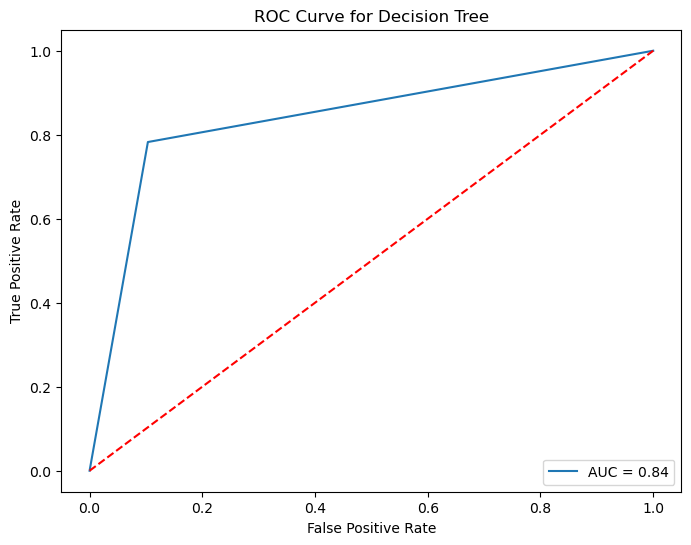

In [2787]:
# ROC curve
dt_false_positive_rate, dt_true_positive_rate, dt_thresholds = roc_curve(y_test, dt_pred)

# Calculate the AUC score
dt_auc_score = auc(dt_false_positive_rate, dt_true_positive_rate)
print("AUC Score:", dt_auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label=f'AUC = {dt_auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


## Hyper Parameter tuning - Decision Tree

####  Applying ensemble methods to improve the accuracy in decision tree model

In [2790]:
# Import Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2792]:
# define Hyper parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [2794]:
# Initialize decision tree model
dt_model = DecisionTreeClassifier()

In [2796]:
# setup grid search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [2798]:
# Fit the model
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [2800]:
# get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
Best Cross-Validation Score: 0.825


Confusion Matrix:
[[26  3]
 [12 11]]
Accuracy: 0.7115384615384616
Precision: 0.7857142857142857
Recall: 0.4782608695652174
F1 Score: 0.5945945945945946
AUC Score: 0.6874062968515742


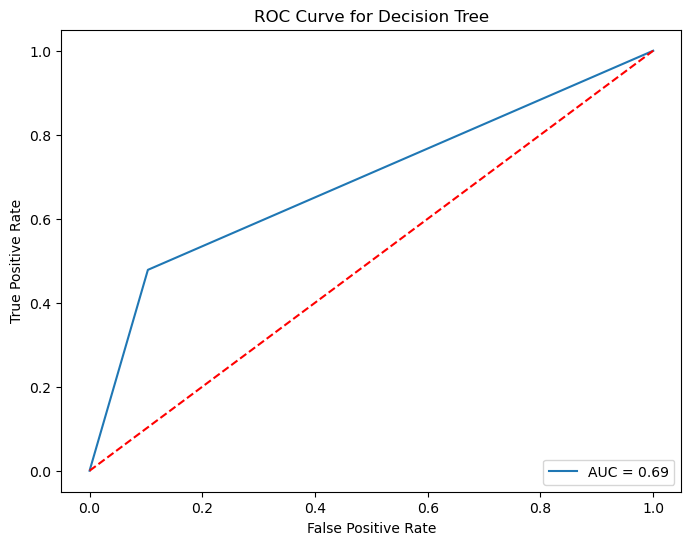

In [2804]:
# Evaluate the tuned model
best_dt_model = grid_search.best_estimator_
dt_pred = best_dt_model.predict(x_test)

# Calculate metrics
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print(f"Confusion Matrix:\n{dt_conf_matrix}")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

# ROC Curve and AUC
dt_false_positive_rate, dt_true_positive_rate, dt_thresholds = roc_curve(y_test, dt_pred)
dt_auc_score = auc(dt_false_positive_rate, dt_true_positive_rate)
print("AUC Score:", dt_auc_score)

plt.figure(figsize=(8, 6))
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label=f'AUC = {dt_auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()


## Random forest - Decision tree  

In [2807]:
# import the libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2809]:
# define the hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [2811]:
# initialize random forest model
rf_model = RandomForestClassifier()

In [2813]:
# setup grid search
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [2815]:
# fit the model
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [2817]:
# get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Score: {best_score_rf}")

Best Parameters: {'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.8166666666666667


Confusion Matrix:
[[27  2]
 [ 5 18]]
Accuracy: 0.8653846153846154
Precision: 0.9
Recall: 0.782608695652174
F1 Score: 0.8372093023255814
AUC Score: 0.8568215892053973


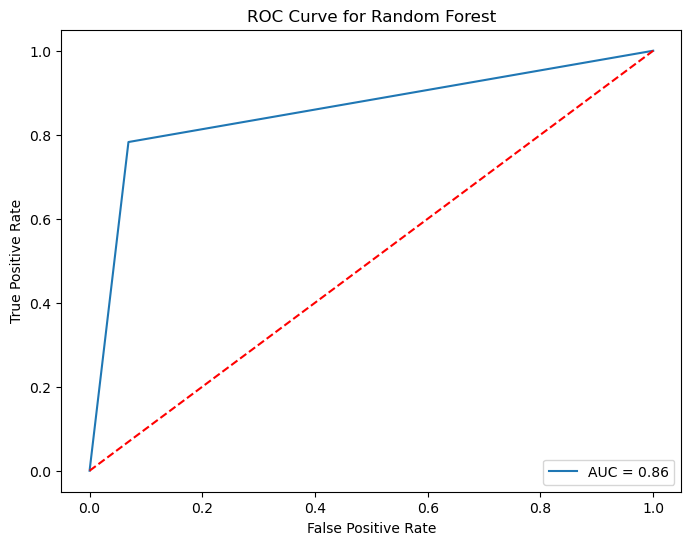

In [2819]:
# evaluate the tuned model
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(x_test)

# Calculate metrics
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

# ROC Curve and AUC
rf_false_positive_rate, rf_true_positive_rate, rf_thresholds = roc_curve(y_test, rf_pred)
rf_auc_score = auc(rf_false_positive_rate, rf_true_positive_rate)
print("AUC Score:", rf_auc_score)

plt.figure(figsize=(8, 6))
plt.plot(rf_false_positive_rate, rf_true_positive_rate, label=f'AUC = {rf_auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

# Gradient Boosting - Decision Tree 

In [2822]:
# import all the libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [2824]:
# define hyper parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [2826]:
# initialize gradient boosting model
gb_model = GradientBoostingClassifier()

In [2828]:
# setup grid search
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [2830]:
# fit the model
grid_search_gb.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [2831]:
# get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print(f"Best Parameters: {best_params_gb}")
print(f"Best Cross-Validation Score: {best_score_gb}")

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.7833333333333333


Confusion Matrix:
[[25  4]
 [ 5 18]]
Accuracy: 0.8269230769230769
Precision: 0.8181818181818182
Recall: 0.782608695652174
F1 Score: 0.8
AUC Score: 0.8223388305847076


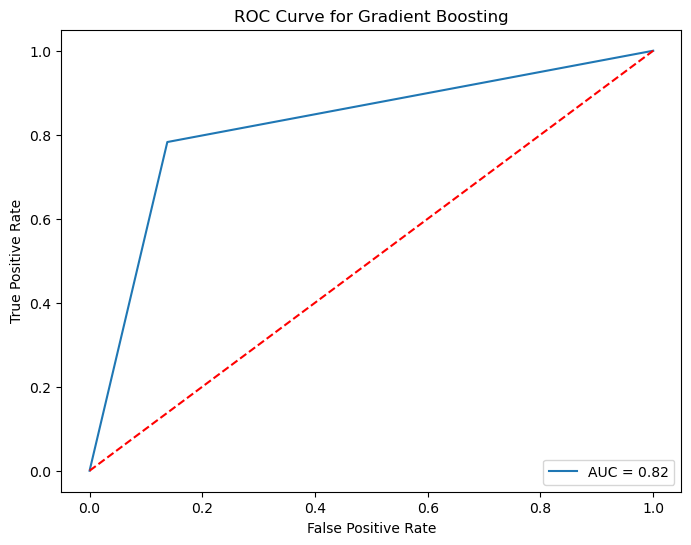

In [2834]:
# evaluate the tuned model
best_gb_model = grid_search_gb.best_estimator_
gb_pred = best_gb_model.predict(x_test)

# Calculate metrics
gb_conf_matrix = confusion_matrix(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

print(f"Confusion Matrix:\n{gb_conf_matrix}")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")

# ROC Curve and AUC
gb_false_positive_rate, gb_true_positive_rate, gb_thresholds = roc_curve(y_test, gb_pred)
gb_auc_score = auc(gb_false_positive_rate, gb_true_positive_rate)
print("AUC Score:", gb_auc_score)

plt.figure(figsize=(8, 6))
plt.plot(gb_false_positive_rate, gb_true_positive_rate, label=f'AUC = {gb_auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

# Insight - Decision Tree Model Accuracy
#### --- Decision tree - 82%
#### --- Applying Hyper parameter tuning on Decision tree - 71%
### --- Applying Random Forest on Decision tree - 86%
#### --- Applying Gradient boosting on Decision tree - 82%

## Overall in Decision tree Best accuracy after applying all the ensemble techniques is 86%

# Support Vector Machine (SVM)

In [2846]:
# Import the libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2848]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [2850]:
# train the SVM Model

# Initialize the SVM model
svm_model = SVC(probability=True)  # Set probability=True to enable ROC curve and AUC calculation

# Train the model
svm_model.fit(x_train, y_train)

# Predict on the test data
svm_pred = svm_model.predict(x_test)


## Evaluation

In [2853]:
# confusion matrix
cm = confusion_matrix(y_test, svm_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[28  1]
 [ 9 14]]


In [2855]:
# Accuracy
accuracy = accuracy_score(y_test, svm_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8076923076923077


In [2857]:
# Precision
precision = precision_score(y_test, svm_pred)
print("Precision:", precision)

Precision: 0.9333333333333333


In [2859]:
# Recall
recall = recall_score(y_test, svm_pred)
print("Recall:", recall)

Recall: 0.6086956521739131


In [2861]:
# f1 Score
f1 = f1_score(y_test, svm_pred)
print("F1 Score:", f1)

F1 Score: 0.7368421052631579


In [2863]:
# Classification report
print("Classification Report:\n", classification_report(y_test, svm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.93      0.61      0.74        23

    accuracy                           0.81        52
   macro avg       0.85      0.79      0.79        52
weighted avg       0.83      0.81      0.80        52



AUC Score for SVM: 0.8755622188905547


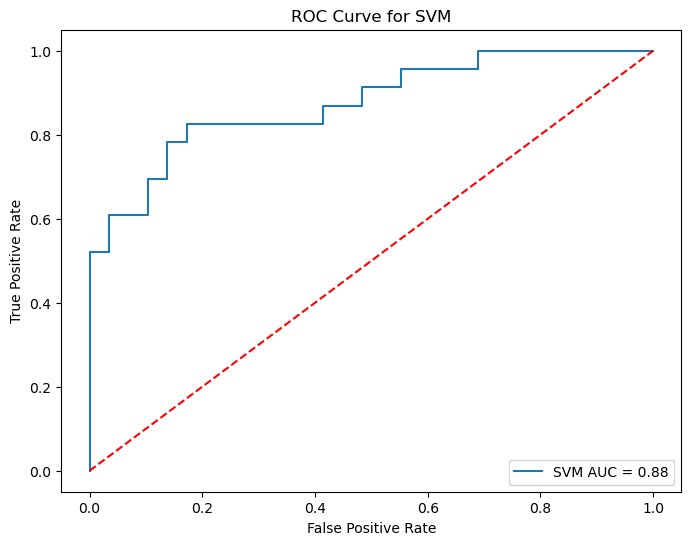

In [2865]:
# ROC and AUC curve
# Calculate the ROC curve and AUC score
svm_prob = svm_model.predict_proba(x_test)[:, 1]  # Probability estimates
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_prob)
auc_svm = auc(fpr_svm, tpr_svm)
print("AUC Score for SVM:", auc_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

## Hyper Parameter Tuning - SVM

In [2868]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2870]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

In [2872]:
# Performing grid Search

# Initialize the model
svm = SVC(probability=True)

# Initialize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [2874]:
# Retrieve the best parameters and best score
# Get the best parameters and best score
best_params_svm = grid_search.best_params_
best_score_svm = grid_search.best_score_

print(f"Best Parameters: {best_params_svm}")
print(f"Best Cross-Validation Score: {best_score_svm}")

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.875


Accuracy: 0.7884615384615384
Precision: 0.875
Recall: 0.6086956521739131
F1 Score: 0.717948717948718
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.88      0.61      0.72        23

    accuracy                           0.79        52
   macro avg       0.81      0.77      0.77        52
weighted avg       0.81      0.79      0.78        52

AUC Score for Tuned SVM: 0.8245877061469266


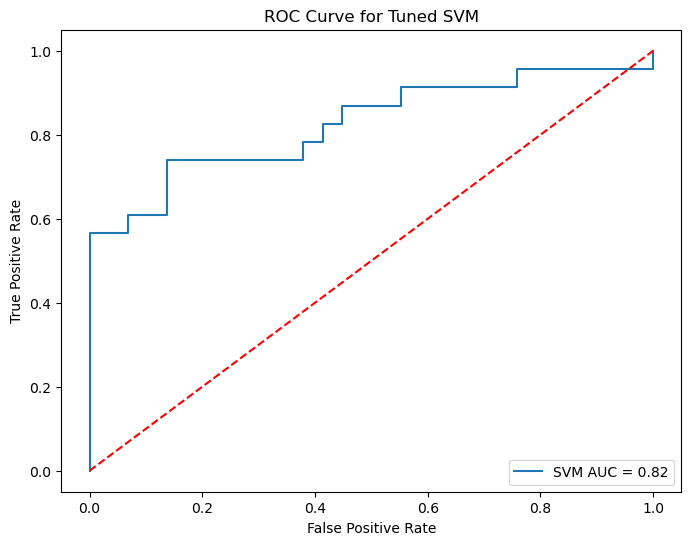

In [2876]:
# Evaluate the Tuned model
# Predict using the best model
svm_best_model = grid_search.best_estimator_
svm_best_pred = svm_best_model.predict(x_test)

# Evaluate the SVM model
accuracy = accuracy_score(y_test, svm_best_pred)
precision = precision_score(y_test, svm_best_pred)
recall = recall_score(y_test, svm_best_pred)
f1 = f1_score(y_test, svm_best_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, svm_best_pred))

# Calculate the ROC curve and AUC score
svm_best_prob = svm_best_model.predict_proba(x_test)[:, 1]
fpr_svm_best, tpr_svm_best, thresholds_svm_best = roc_curve(y_test, svm_best_prob)
auc_svm_best = auc(fpr_svm_best, tpr_svm_best)

print("AUC Score for Tuned SVM:", auc_svm_best)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_best, tpr_svm_best, label=f'SVM AUC = {auc_svm_best:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned SVM')
plt.legend(loc='lower right')
plt.show()

## Feature Engineering - SVM

In [2879]:
# Scale the data
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming your preprocessed data is stored in 'new_data'
x = new_data.drop('heart_disease_present', axis=1)
y = new_data['heart_disease_present']

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
x_scaled = scaler.fit_transform(x)

# Convert the scaled data back to a DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [2881]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(kernel='linear')  # Using linear kernel for RFE

# Initialize RFE with the SVM model
rfe = RFE(estimator=svm_model, n_features_to_select=5)  # Select the top 5 features

# Fit RFE
rfe.fit(x_scaled_df, y)

# Get the selected features
selected_features = x_scaled_df.columns[rfe.support_]
print("Selected Features:", selected_features)

# Use only the selected features for the next steps
x_selected = x_scaled_df[selected_features]

Selected Features: Index(['thal', 'chest_pain_type', 'num_major_vessels',
       'exercise_induced_angina', 'oldpeak_eq_st_depression'],
      dtype='object')


In [2883]:
# Create polynomial features to capture non-linear relationship
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Create polynomial features
x_poly = poly.fit_transform(x_selected)

# Convert the polynomial features back to a DataFrame
poly_features = poly.get_feature_names_out(selected_features)
x_poly_df = pd.DataFrame(x_poly, columns=poly_features)

Accuracy: 0.8461538461538461
Precision: 0.7777777777777778
Recall: 0.9130434782608695
F1 Score: 0.84
AUC Score: 0.8530734632683659


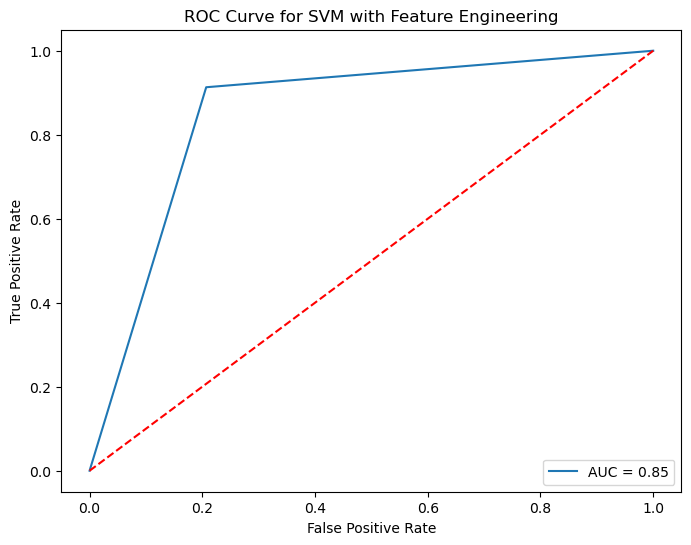

In [2885]:
# Train the SVM model with the new polynomial features.
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_poly_df, y, test_size=0.30, random_state=2)

# Initialize the SVM model with RBF kernel
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model
svm_model.fit(x_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(false_positive_rate, true_positive_rate)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with Feature Engineering')
plt.legend(loc='lower right')
plt.show()

## Data Augmentation - SVM Model

In [2890]:
# Apply smote
!pip install imbalanced-learn

In [2892]:
# import libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

In [2894]:
x = new_data.drop('heart_disease_present', axis=1)
y = new_data['heart_disease_present']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [2896]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=2)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [2898]:
# Scale the data
scaler = StandardScaler()
x_train_smote = scaler.fit_transform(x_train_smote)
x_test = scaler.transform(x_test)

In [2900]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(x_train_smote, y_train_smote)

SVC(C=1)

In [2902]:
# Predict on the test data
y_pred = svm_model.predict(x_test)

Accuracy: 0.8653846153846154
Precision: 0.8636363636363636
Recall: 0.8260869565217391
F1 Score: 0.8444444444444444
AUC Score: 0.8613193403298351


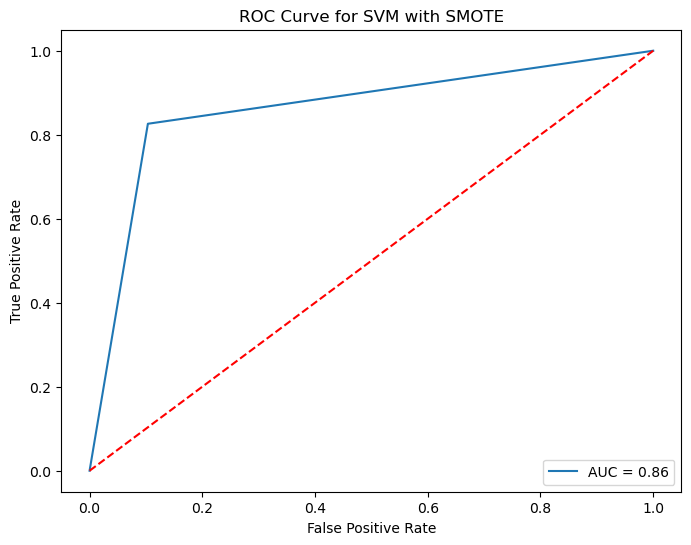

In [2904]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = auc(false_positive_rate, true_positive_rate)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with SMOTE')
plt.legend(loc='lower right')
plt.show()

## Ensemble technique - SVM
### Bagging with SVM

In [2909]:
# import libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2911]:
x = new_data.drop('heart_disease_present', axis=1)
y = new_data['heart_disease_present']

In [2913]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [2915]:
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2917]:
# Initialize the base SVM model
svm_base = SVC(kernel='rbf', C=1, gamma='scale', probability=True)

In [2921]:
# Initialize the BaggingClassifier with the SVM base model
bagging_model = BaggingClassifier(estimator=svm_base, n_estimators=10, random_state=2)

# Train the bagging model
bagging_model.fit(x_train, y_train)

# Predict on the test data
y_pred = bagging_model.predict(x_test)

Accuracy: 0.9230769230769231
Precision: 0.9523809523809523
Recall: 0.8695652173913043
F1 Score: 0.9090909090909091
AUC Score: 0.9550224887556222


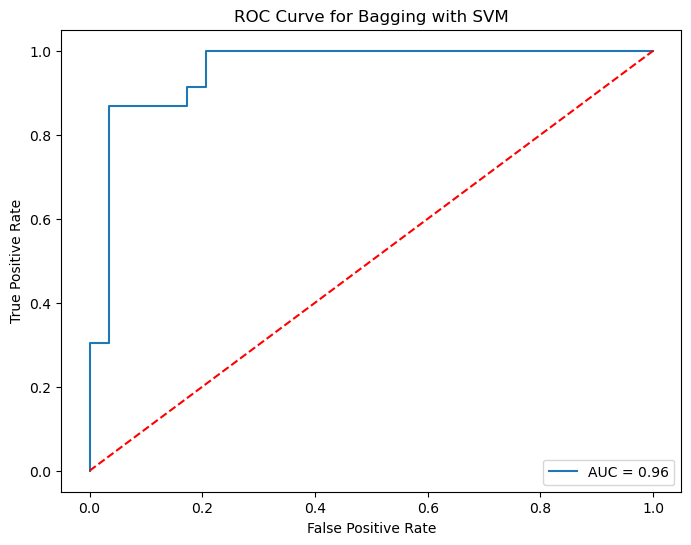

In [2923]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the ROC curve
y_pred_proba = bagging_model.predict_proba(x_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = auc(false_positive_rate, true_positive_rate)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging with SVM')
plt.legend(loc='lower right')
plt.show()

## Voting Classifier with SVM
#### Combine SVM with other models like Random Forest or Logistic Regression in a Voting Classifier to leverage the strengths of multiple algorithms.

In [2928]:
# import the libraries
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2930]:
x = new_data.drop('heart_disease_present', axis=1)
y = new_data['heart_disease_present']

In [2932]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [2934]:
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2936]:
# Initialize the individual models
svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=2)
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
lr_model = LogisticRegression(random_state=2)

In [2938]:
# Create a Voting Classifier with the three models
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('lr', lr_model)
], voting='soft')  # Use soft voting to average probabilities

In [2940]:
# Train the voting model
voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=1, probability=True, random_state=2)),
                             ('rf', RandomForestClassifier(random_state=2)),
                             ('lr', LogisticRegression(random_state=2))],
                 voting='soft')

In [2942]:
# Predict on the test data
y_pred = voting_model.predict(x_test)

Accuracy: 0.8846153846153846
Precision: 0.9047619047619048
Recall: 0.8260869565217391
F1 Score: 0.8636363636363636
AUC Score: 0.9385307346326835


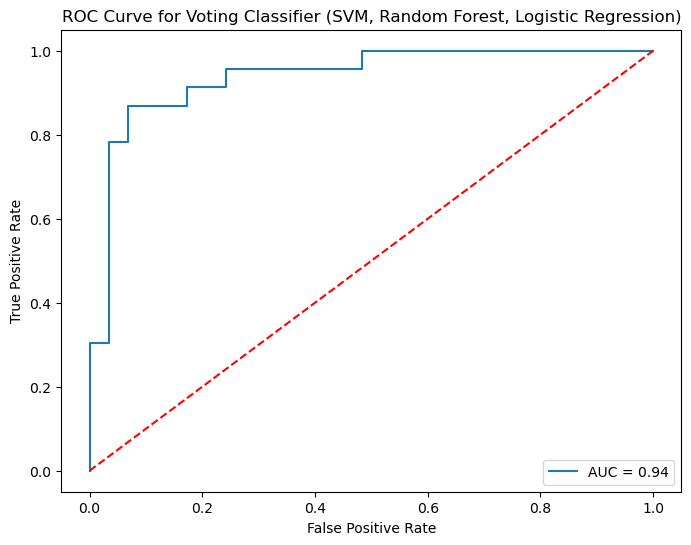

In [2944]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate the ROC curve
y_pred_proba = voting_model.predict_proba(x_test)[:, 1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = auc(false_positive_rate, true_positive_rate)
print("AUC Score:", auc_score)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Voting Classifier (SVM, Random Forest, Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

## Regularisation Technique - SVM
### Regularization techniques like L1 (Lasso) and L2 (Ridge) are used to prevent overfitting and help in feature selection.

#### Step -1 In scikit-learn, SVM with L2 regularization is implemented by default when using SVC. 

#### Step -2 The LinearSVC class for L1 regularization or a combination of L1 and L2 regularization (Elastic Net).

In [2956]:
# Step 1: Implement L2 Regularization (Ridge) with SVC
# import all libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2958]:
x = new_data.drop('heart_disease_present', axis=1)
y = new_data['heart_disease_present']

In [2960]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

In [2962]:
# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2964]:
# L2 Regularization SVM (default)
svm_model_l2 = SVC(kernel='linear', C=1, random_state=2, probability=True)
svm_model_l2.fit(x_train, y_train)

SVC(C=1, kernel='linear', probability=True, random_state=2)

In [2966]:
# Predict on the test data
y_pred_l2 = svm_model_l2.predict(x_test)

L2 Regularization SVM - Accuracy: 0.8846153846153846
L2 Regularization SVM - Precision: 0.9047619047619048
L2 Regularization SVM - Recall: 0.8260869565217391
L2 Regularization SVM - F1 Score: 0.8636363636363636
L2 Regularization SVM - AUC Score: 0.9490254872563718


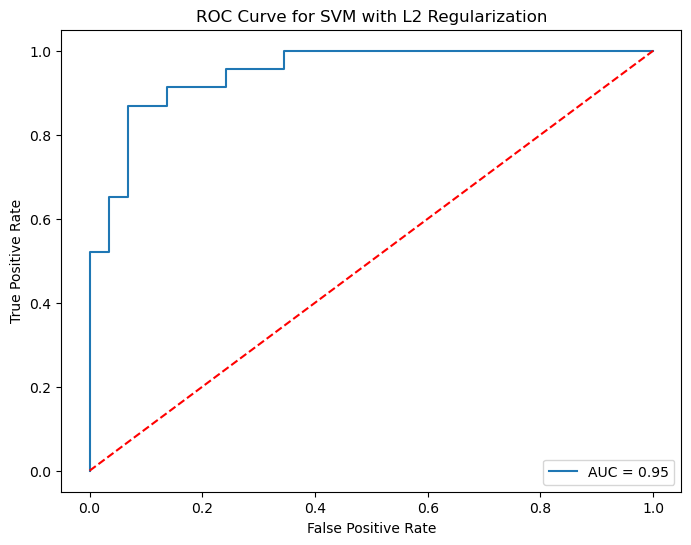

In [2968]:
# Evaluate the model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"L2 Regularization SVM - Accuracy: {accuracy_l2}")
print(f"L2 Regularization SVM - Precision: {precision_l2}")
print(f"L2 Regularization SVM - Recall: {recall_l2}")
print(f"L2 Regularization SVM - F1 Score: {f1_l2}")

# Calculate the ROC curve
y_pred_proba_l2 = svm_model_l2.predict_proba(x_test)[:, 1]
false_positive_rate_l2, true_positive_rate_l2, thresholds_l2 = roc_curve(y_test, y_pred_proba_l2)

# Calculate the AUC score
auc_score_l2 = auc(false_positive_rate_l2, true_positive_rate_l2)
print("L2 Regularization SVM - AUC Score:", auc_score_l2)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_l2, true_positive_rate_l2, label=f'AUC = {auc_score_l2:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with L2 Regularization')
plt.legend(loc='lower right')
plt.show()

In [2970]:
# Step 2: Implement L1 Regularization (Lasso) with LinearSVC
# import libraries
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [2972]:
# L1 Regularization SVM
svm_model_l1 = LinearSVC(C=1, penalty='l1', dual=False, random_state=2)

In [2974]:
# Calibrate the model to get probability estimates
calibrated_svm_l1 = CalibratedClassifierCV(svm_model_l1, cv=5)
calibrated_svm_l1.fit(x_train, y_train)

CalibratedClassifierCV(cv=5,
                       estimator=LinearSVC(C=1, dual=False, penalty='l1',
                                           random_state=2))

In [2976]:
# Predict on the test data
y_pred_l1 = calibrated_svm_l1.predict(x_test)

L1 Regularization SVM - Accuracy: 0.8653846153846154
L1 Regularization SVM - Precision: 0.9
L1 Regularization SVM - Recall: 0.782608695652174
L1 Regularization SVM - F1 Score: 0.8372093023255814
L1 Regularization SVM - AUC Score: 0.9430284857571214


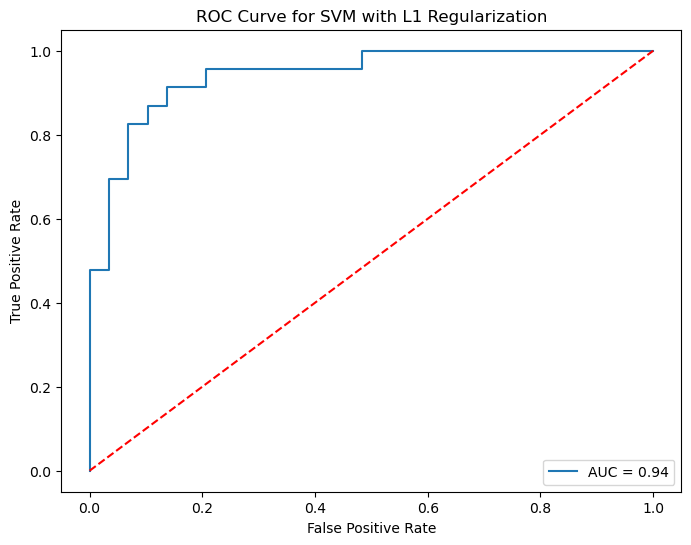

In [2978]:
# Evaluate the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1)
recall_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print(f"L1 Regularization SVM - Accuracy: {accuracy_l1}")
print(f"L1 Regularization SVM - Precision: {precision_l1}")
print(f"L1 Regularization SVM - Recall: {recall_l1}")
print(f"L1 Regularization SVM - F1 Score: {f1_l1}")

# Calculate the ROC curve
y_pred_proba_l1 = calibrated_svm_l1.predict_proba(x_test)[:, 1]
false_positive_rate_l1, true_positive_rate_l1, thresholds_l1 = roc_curve(y_test, y_pred_proba_l1)

# Calculate the AUC score
auc_score_l1 = auc(false_positive_rate_l1, true_positive_rate_l1)
print("L1 Regularization SVM - AUC Score:", auc_score_l1)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_l1, true_positive_rate_l1, label=f'AUC = {auc_score_l1:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with L1 Regularization')
plt.legend(loc='lower right')
plt.show()

## Cross validation - SVM

#### Cross-validation is a technique that helps assess how well your machine learning model generalizes to an independent dataset. 
#### One of the most common methods is K-fold cross-validation, where the dataset is divided into K subsets (folds), and the model is trained on K-1 folds while being tested on the remaining fold. 
#### This process is repeated K times, with each fold used exactly once as the test data. The results are then averaged to produce a single estimation.

In [2985]:
# import libraries
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [2987]:
# Implement K-Fold Cross-Validation
# Define the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=2, probability=True)

# Define the K-Fold Cross Validator
kfold = KFold(n_splits=10, shuffle=True, random_state=2)

# Perform cross-validation
cv_accuracy = cross_val_score(svm_model, x, y, cv=kfold, scoring='accuracy')
cv_precision = cross_val_score(svm_model, x, y, cv=kfold, scoring='precision')
cv_recall = cross_val_score(svm_model, x, y, cv=kfold, scoring='recall')
cv_f1 = cross_val_score(svm_model, x, y, cv=kfold, scoring='f1')

# Print the cross-validation results
print(f"Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Cross-Validation Precision: {np.mean(cv_precision):.4f}")
print(f"Cross-Validation Recall: {np.mean(cv_recall):.4f}")
print(f"Cross-Validation F1 Score: {np.mean(cv_f1):.4f}")

Cross-Validation Accuracy: 0.8193
Cross-Validation Precision: 0.8104
Cross-Validation Recall: 0.7540
Cross-Validation F1 Score: 0.7735


Cross-Validated AUC Score: 0.8852796052631579


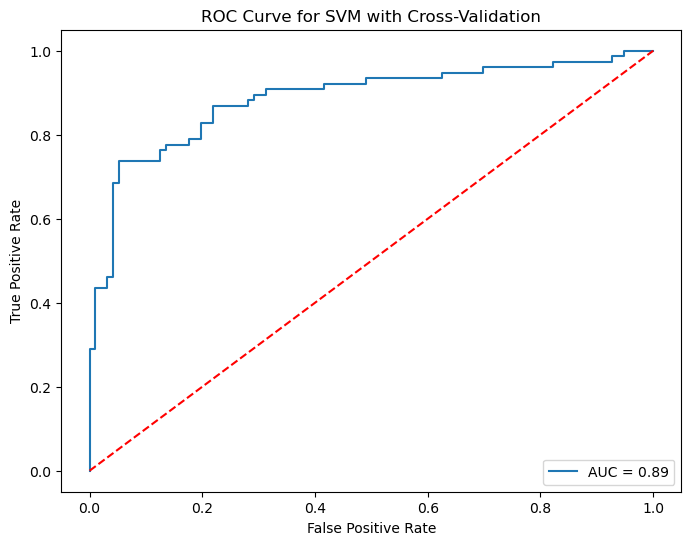

In [2989]:
# Evaluate the Model Using ROC and AUC
# Get cross-validated predictions
y_pred_cv = cross_val_predict(svm_model, x, y, cv=kfold, method='predict_proba')

# Calculate ROC and AUC
false_positive_rate_cv, true_positive_rate_cv, thresholds_cv = roc_curve(y, y_pred_cv[:, 1])
auc_score_cv = auc(false_positive_rate_cv, true_positive_rate_cv)

print("Cross-Validated AUC Score:", auc_score_cv)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate_cv, true_positive_rate_cv, label=f'AUC = {auc_score_cv:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with Cross-Validation')
plt.legend(loc='lower right')
plt.show()

## Kernel Trick Enhancements - SVM
#### Custom Kernel -- A custom kernel function is defined as a Python function that takes two input vectors and returns a scalar value. 


In [2995]:
# import libraries 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define a custom kernel function
def custom_kernel(X, Y):
    sigma = 0.5
    X = np.array(X)  # Convert to NumPy array
    Y = np.array(Y)  # Convert to NumPy array
    return np.exp(-sigma * np.linalg.norm(X[:, np.newaxis] - Y, axis=2))

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Initialize SVM with the custom kernel
svm_custom = SVC(kernel=custom_kernel, probability=True)

# Train the model
svm_custom.fit(x_train, y_train)

# Predict on the test data
y_pred = svm_custom.predict(x_test)

Accuracy: 0.9038
Precision: 0.9091
Recall: 0.8696
F1 Score: 0.8889


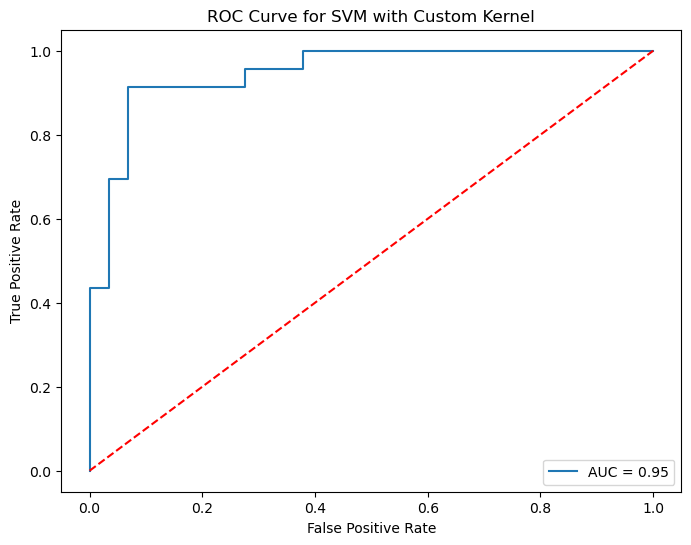

AUC Score: 0.9475262368815592


In [2997]:
# evaluate the model
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Calculate ROC curve and AUC
y_pred_proba = svm_custom.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM with Custom Kernel')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score)

# Insight - SVM Model Accuracy
### --- SVM Model - 81%
### --- Hyper parameter tuning - 79%
### --- Data Augmentation - 86%
### --- Feature Engineering - 84%
### --- Ensemble techniques 
## ---- Bagging with SVM - 92%
#### ---- Voting Classifier with SVM - 88%
### --- Regularisation techniques
#### ---- L2 regularisation - 88%
#### ---- L1 Regularization - 86%
### --- Kernel trick enhancement - 90%


## Overall in SVM Best accuracy after applying all the techniques is 92%

# Random Forest 

In [3009]:
# Import Liraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3011]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

In [3013]:
# Train the model
rf_model.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(x_test)

Accuracy: 0.8269
Precision: 0.7917
Recall: 0.8261
F1 Score: 0.8085


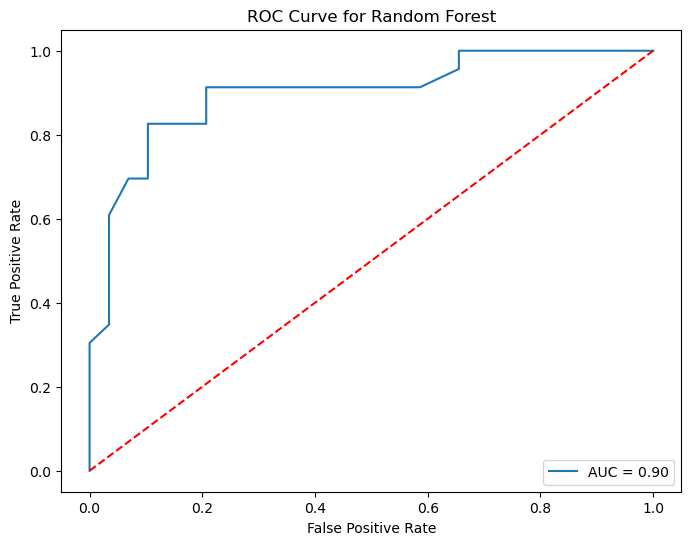

AUC Score: 0.8988005997001498


In [3015]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Calculate ROC curve and AUC
y_pred_proba_rf = rf_model.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
auc_score_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_score_rf:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc_score_rf)

## Hyper Parameter tuning - Random Forest

In [3040]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

In [3042]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=2)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [3043]:
# Get the best parameters and the best cross-validation score
best_params_rf = grid_search.best_params_
best_score_rf = grid_search.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Score: {best_score_rf:.4f}")

# Train the Random Forest model with the best parameters
rf_best_model = RandomForestClassifier(**best_params_rf, random_state=2)
rf_best_model.fit(x_train, y_train)

# Predict on the test data
y_pred_rf_best = rf_best_model.predict(x_test)

# Evaluate the performance
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"Precision: {precision_rf_best:.4f}")
print(f"Recall: {recall_rf_best:.4f}")
print(f"F1 Score: {f1_rf_best:.4f}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.8000
Accuracy: 0.8462
Precision: 0.8261
Recall: 0.8261
F1 Score: 0.8261


AUC Score: 0.9100


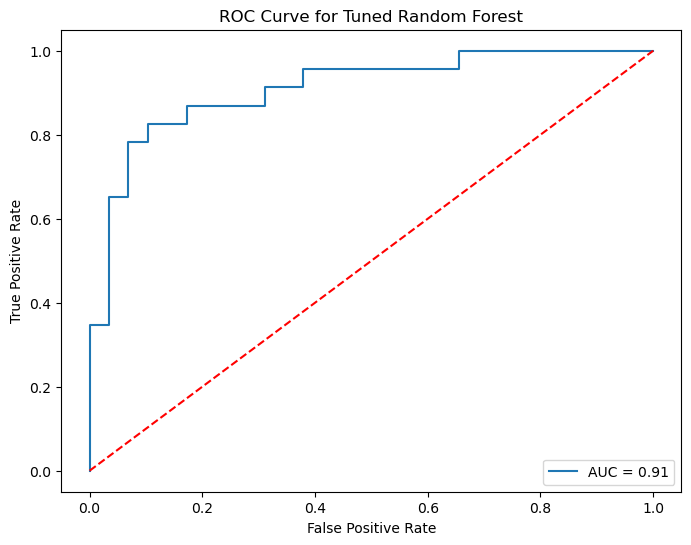

In [3046]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the ROC curve
y_prob_rf_best = rf_best_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_rf_best, tpr_rf_best, thresholds_rf_best = roc_curve(y_test, y_prob_rf_best)

# Calculate the AUC score
auc_rf_best = auc(fpr_rf_best, tpr_rf_best)
print(f"AUC Score: {auc_rf_best:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f'AUC = {auc_rf_best:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest')
plt.legend(loc='lower right')
plt.show()

## Feature Engineering - Random Forest

In [3049]:
# Polynomial Feature - We can add polynomial features to capture non-linear relationships.
from sklearn.preprocessing import PolynomialFeatures

# Initialize the PolynomialFeatures object
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Apply polynomial features to the numerical columns
x_poly = poly.fit_transform(x)

# Convert the polynomial features into a DataFrame with appropriate column names
x_poly_df = pd.DataFrame(x_poly, columns=poly.get_feature_names_out(x.columns))

In [3051]:
# Interaction Feature - Let's create interaction features between some of the most important features.
# Create interaction features manually (for example between 'age' and 'serum_cholesterol_mg_per_dl')
x['age_chol_interaction'] = x['age'] * x['serum_cholesterol_mg_per_dl']

In [3053]:
# Encoding categorical variables - If you have categorical variables that haven't been encoded, you can use one-hot encoding or label encoding.
x_encoded = pd.get_dummies(x, drop_first=True)

In [3055]:
# Retrain the random forest model with engineered features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Splitting the new data with engineered features
x_train_fe, x_test_fe, y_train_fe, y_test_fe = train_test_split(x_encoded, y, test_size=0.3, random_state=2)

# Initialize the Random Forest model
rf_model_fe = RandomForestClassifier(random_state=2)

# Train the model with the new features
rf_model_fe.fit(x_train_fe, y_train_fe)

# Predict on the test data
y_pred_rf_fe = rf_model_fe.predict(x_test_fe)

# Evaluate the performance
accuracy_rf_fe = accuracy_score(y_test_fe, y_pred_rf_fe)
precision_rf_fe = precision_score(y_test_fe, y_pred_rf_fe)
recall_rf_fe = recall_score(y_test_fe, y_pred_rf_fe)
f1_rf_fe = f1_score(y_test_fe, y_pred_rf_fe)

print(f"Accuracy after Feature Engineering: {accuracy_rf_fe:.4f}")
print(f"Precision after Feature Engineering: {precision_rf_fe:.4f}")
print(f"Recall after Feature Engineering: {recall_rf_fe:.4f}")
print(f"F1 Score after Feature Engineering: {f1_rf_fe:.4f}")

Accuracy after Feature Engineering: 0.8654
Precision after Feature Engineering: 0.8333
Recall after Feature Engineering: 0.8696
F1 Score after Feature Engineering: 0.8511


AUC Score after Feature Engineering: 0.9168


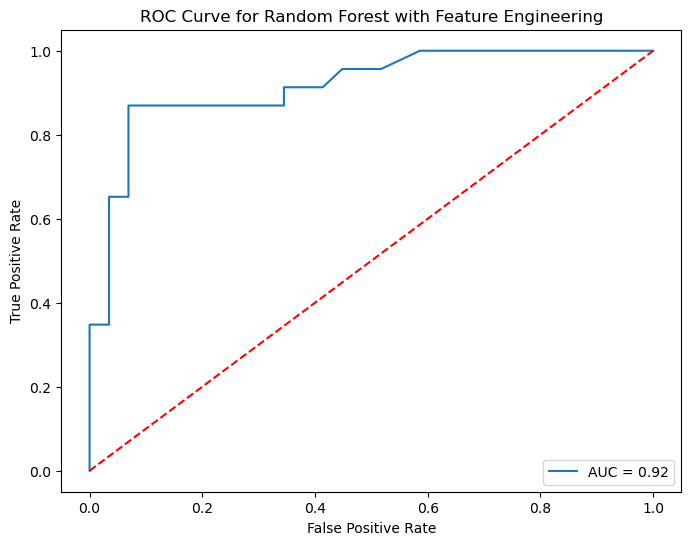

In [3057]:
# Predict probabilities for the ROC curve
y_prob_rf_fe = rf_model_fe.predict_proba(x_test_fe)[:, 1]

# Calculate the ROC curve
fpr_rf_fe, tpr_rf_fe, thresholds_rf_fe = roc_curve(y_test_fe, y_prob_rf_fe)

# Calculate the AUC score
auc_rf_fe = auc(fpr_rf_fe, tpr_rf_fe)
print(f"AUC Score after Feature Engineering: {auc_rf_fe:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_fe, tpr_rf_fe, label=f'AUC = {auc_rf_fe:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with Feature Engineering')
plt.legend(loc='lower right')
plt.show()

## Ensemble techniques - Random Forest
### Stacking 

In [3060]:
# Stacking involves training multiple models and then using another model (a meta-model) to combine their predictions.
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(random_state=2)),
    ('svm', SVC(probability=True, random_state=2)),
]

# Define the stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(x_train_fe, y_train_fe)

# Predict on the test data
y_pred_stacking = stacking_model.predict(x_test_fe)

# Evaluate the performance
accuracy_stacking = accuracy_score(y_test_fe, y_pred_stacking)
precision_stacking = precision_score(y_test_fe, y_pred_stacking)
recall_stacking = recall_score(y_test_fe, y_pred_stacking)
f1_stacking = f1_score(y_test_fe, y_pred_stacking)

print(f"Stacking Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Precision: {precision_stacking:.4f}")
print(f"Stacking Recall: {recall_stacking:.4f}")
print(f"Stacking F1 Score: {f1_stacking:.4f}")

Stacking Accuracy: 0.9231
Stacking Precision: 0.9130
Stacking Recall: 0.9130
Stacking F1 Score: 0.9130


## Blending 

In [3063]:
# Blending is similar to stacking but usually simpler, using a weighted average of predictions from different models.
from sklearn.ensemble import VotingClassifier

# Define the base models
blending_model = VotingClassifier(estimators=estimators, voting='soft')

# Train the blending model
blending_model.fit(x_train_fe, y_train_fe)

# Predict on the test data
y_pred_blending = blending_model.predict(x_test_fe)

# Evaluate the performance
accuracy_blending = accuracy_score(y_test_fe, y_pred_blending)
precision_blending = precision_score(y_test_fe, y_pred_blending)
recall_blending = recall_score(y_test_fe, y_pred_blending)
f1_blending = f1_score(y_test_fe, y_pred_blending)

print(f"Blending Accuracy: {accuracy_blending:.4f}")
print(f"Blending Precision: {precision_blending:.4f}")
print(f"Blending Recall: {recall_blending:.4f}")
print(f"Blending F1 Score: {f1_blending:.4f}")

Blending Accuracy: 0.9038
Blending Precision: 0.9091
Blending Recall: 0.8696
Blending F1 Score: 0.8889


## Boosting 

In [3066]:
# Boosting is an ensemble technique that builds models sequentially, each correcting the errors of the previous one.
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
boosting_model = GradientBoostingClassifier(random_state=2)

# Train the boosting model
boosting_model.fit(x_train_fe, y_train_fe)

# Predict on the test data
y_pred_boosting = boosting_model.predict(x_test_fe)

# Evaluate the performance
accuracy_boosting = accuracy_score(y_test_fe, y_pred_boosting)
precision_boosting = precision_score(y_test_fe, y_pred_boosting)
recall_boosting = recall_score(y_test_fe, y_pred_boosting)
f1_boosting = f1_score(y_test_fe, y_pred_boosting)

print(f"Boosting Accuracy: {accuracy_boosting:.4f}")
print(f"Boosting Precision: {precision_boosting:.4f}")
print(f"Boosting Recall: {recall_boosting:.4f}")
print(f"Boosting F1 Score: {f1_boosting:.4f}")

Boosting Accuracy: 0.7692
Boosting Precision: 0.7391
Boosting Recall: 0.7391
Boosting F1 Score: 0.7391


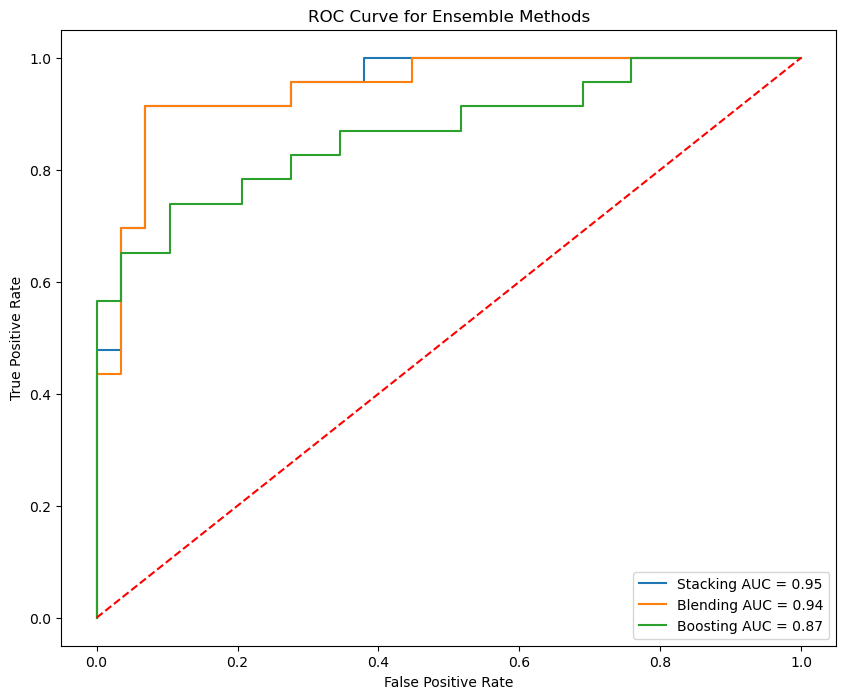

In [3068]:
# ROC and AUC Curve
# Predict probabilities for ROC curves
y_prob_stacking = stacking_model.predict_proba(x_test_fe)[:, 1]
y_prob_blending = blending_model.predict_proba(x_test_fe)[:, 1]
y_prob_boosting = boosting_model.predict_proba(x_test_fe)[:, 1]

# Calculate ROC curves
fpr_stacking, tpr_stacking, _ = roc_curve(y_test_fe, y_prob_stacking)
fpr_blending, tpr_blending, _ = roc_curve(y_test_fe, y_prob_blending)
fpr_boosting, tpr_boosting, _ = roc_curve(y_test_fe, y_prob_boosting)

# Calculate AUC scores
auc_stacking = auc(fpr_stacking, tpr_stacking)
auc_blending = auc(fpr_blending, tpr_blending)
auc_boosting = auc(fpr_boosting, tpr_boosting)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking AUC = {auc_stacking:.2f}')
plt.plot(fpr_blending, tpr_blending, label=f'Blending AUC = {auc_blending:.2f}')
plt.plot(fpr_boosting, tpr_boosting, label=f'Boosting AUC = {auc_boosting:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Methods')
plt.legend(loc='lower right')
plt.show()

## Data Augmentation - Random Forest
### Implement SMOTE for oversampling

In [3071]:
# Data augmentation techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to address class imbalance in your dataset. 
# SMOTE generates synthetic samples for the minority class to balance the dataset, which can lead to improved model performance.
# SMOTE with random forest model

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=2)
x_train_smote, y_train_smote = smote.fit_resample(x_train_fe, y_train_fe)

# Train the Random Forest model on the SMOTE-augmented data
rf_model_smote = RandomForestClassifier(random_state=2)
rf_model_smote.fit(x_train_smote, y_train_smote)

# Predict on the test data
y_pred_smote = rf_model_smote.predict(x_test_fe)

# Evaluate the performance
accuracy_smote = accuracy_score(y_test_fe, y_pred_smote)
precision_smote = precision_score(y_test_fe, y_pred_smote)
recall_smote = recall_score(y_test_fe, y_pred_smote)
f1_smote = f1_score(y_test_fe, y_pred_smote)

print(f"SMOTE Random Forest Accuracy: {accuracy_smote:.4f}")
print(f"SMOTE Random Forest Precision: {precision_smote:.4f}")
print(f"SMOTE Random Forest Recall: {recall_smote:.4f}")
print(f"SMOTE Random Forest F1 Score: {f1_smote:.4f}")

SMOTE Random Forest Accuracy: 0.8654
SMOTE Random Forest Precision: 0.8333
SMOTE Random Forest Recall: 0.8696
SMOTE Random Forest F1 Score: 0.8511


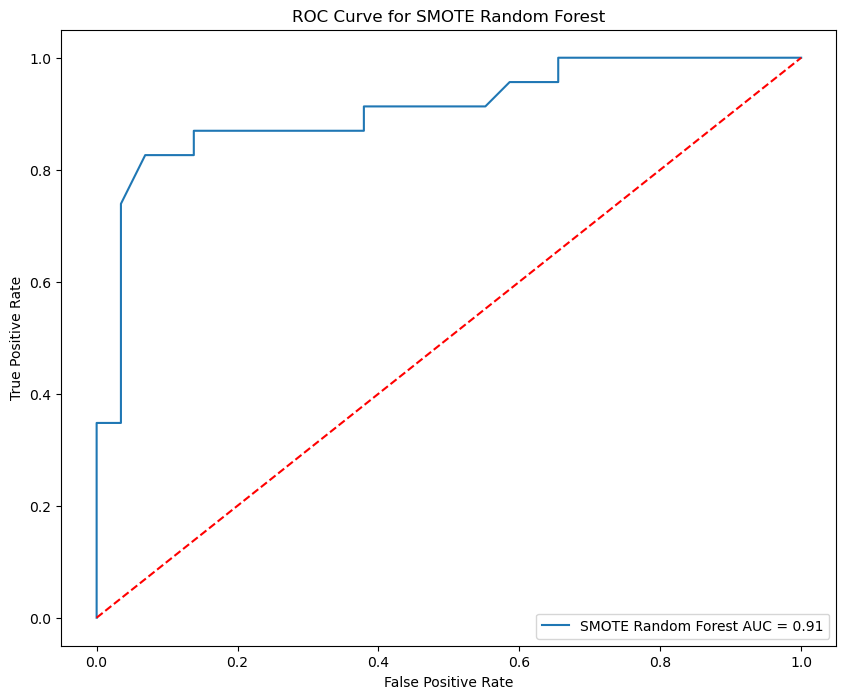

In [3073]:
# Plot ROC and AUC curve for oversampling
# Predict probabilities for ROC curve
y_prob_smote = rf_model_smote.predict_proba(x_test_fe)[:, 1]

# Calculate ROC curve
fpr_smote, tpr_smote, _ = roc_curve(y_test_fe, y_prob_smote)

# Calculate AUC score
auc_smote = auc(fpr_smote, tpr_smote)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE Random Forest AUC = {auc_smote:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SMOTE Random Forest')
plt.legend(loc='lower right')
plt.show()

### Evaluate with Undersampling

In [3076]:
# Undersampling can be used to reduce the number of majority class samples to balance the dataset.
from imblearn.under_sampling import RandomUnderSampler

# Apply Random Under Sampling
undersample = RandomUnderSampler(random_state=2)
x_train_under, y_train_under = undersample.fit_resample(x_train_fe, y_train_fe)

# Train the Random Forest model on the undersampled data
rf_model_under = RandomForestClassifier(random_state=2)
rf_model_under.fit(x_train_under, y_train_under)

# Predict on the test data
y_pred_under = rf_model_under.predict(x_test_fe)

# Evaluate the performance
accuracy_under = accuracy_score(y_test_fe, y_pred_under)
precision_under = precision_score(y_test_fe, y_pred_under)
recall_under = recall_score(y_test_fe, y_pred_under)
f1_under = f1_score(y_test_fe, y_pred_under)

print(f"Undersampled Random Forest Accuracy: {accuracy_under:.4f}")
print(f"Undersampled Random Forest Precision: {precision_under:.4f}")
print(f"Undersampled Random Forest Recall: {recall_under:.4f}")
print(f"Undersampled Random Forest F1 Score: {f1_under:.4f}")

Undersampled Random Forest Accuracy: 0.8462
Undersampled Random Forest Precision: 0.8000
Undersampled Random Forest Recall: 0.8696
Undersampled Random Forest F1 Score: 0.8333


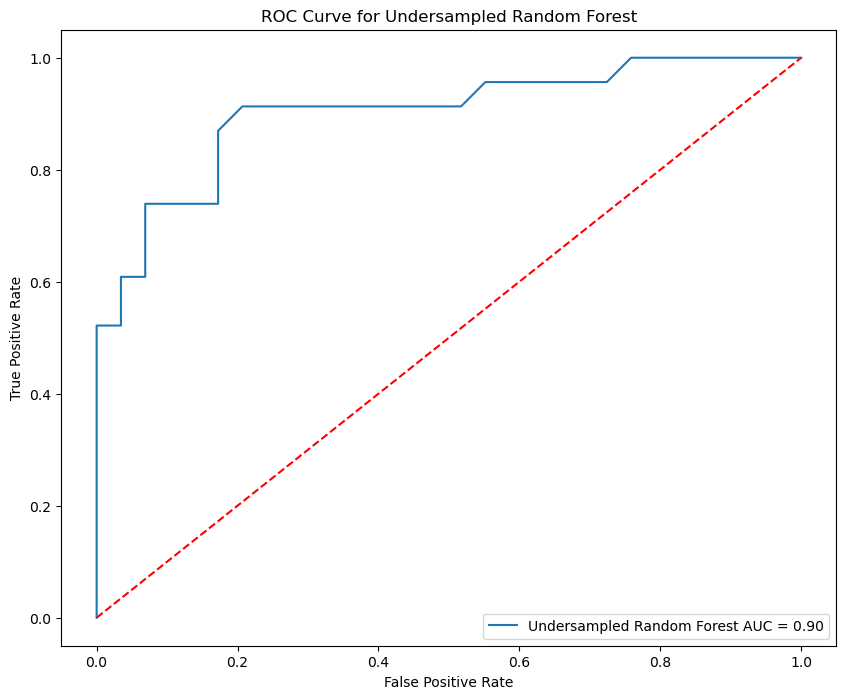

In [3078]:
# Plot ROC and AUC curve for undersampling'
# Predict probabilities for ROC curve
y_prob_under = rf_model_under.predict_proba(x_test_fe)[:, 1]

# Calculate ROC curve
fpr_under, tpr_under, _ = roc_curve(y_test_fe, y_prob_under)

# Calculate AUC score
auc_under = auc(fpr_under, tpr_under)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_under, tpr_under, label=f'Undersampled Random Forest AUC = {auc_under:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Undersampled Random Forest')
plt.legend(loc='lower right')
plt.show()

## Cross Validation - K-Fold - Random Forest

Cross-Validation Accuracy: 0.7750 ± 0.0425


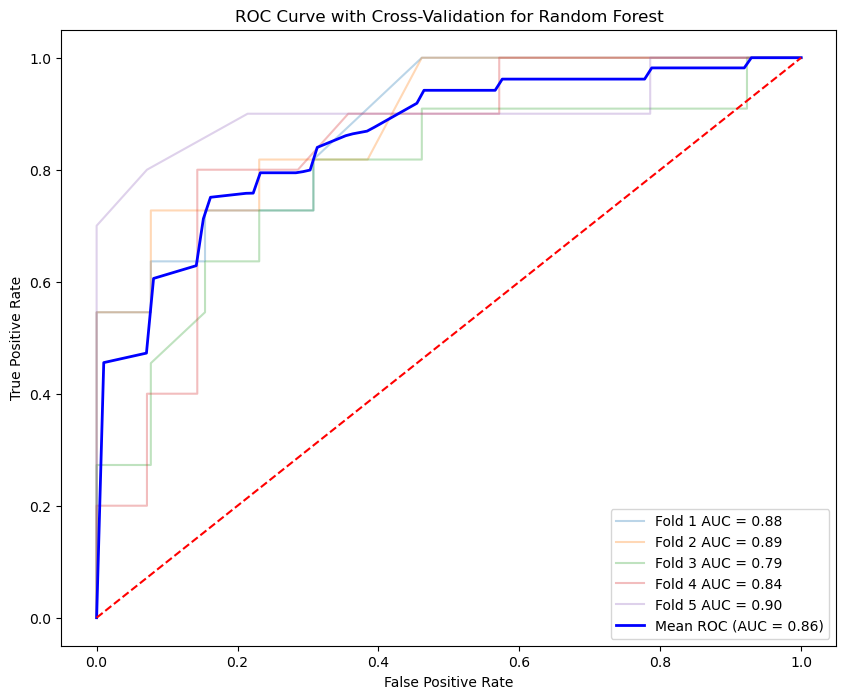

In [3087]:
# we are using 5-fold cross-validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define the model
rf_model = RandomForestClassifier(random_state=2)

# Define the k-fold cross-validation procedure
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

# Evaluate the model with cross-validation
cv_scores = cross_val_score(rf_model, x_train_fe, y_train_fe, cv=kf, scoring='accuracy')

# Print the average cross-validation score
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Initialize lists for storing true positive rates and AUCs
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for i, (train_index, test_index) in enumerate(kf.split(x_train_fe, y_train_fe)):
    # Split the data
    x_train_cv, x_test_cv = x_train_fe.iloc[train_index], x_train_fe.iloc[test_index]
    y_train_cv, y_test_cv = y_train_fe.iloc[train_index], y_train_fe.iloc[test_index]
    
    # Train the model
    rf_model.fit(x_train_cv, y_train_cv)
    
    # Predict probabilities
    y_prob_cv = rf_model.predict_proba(x_test_cv)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test_cv, y_prob_cv)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Plot the ROC curve for each fold
    plt.plot(fpr, tpr, alpha=0.3, label=f'Fold {i+1} AUC = {roc_auc:.2f}')

# Plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2)

# Plot the random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# Finalize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Cross-Validation for Random Forest')
plt.legend(loc='lower right')
plt.show()


## Regularization - Random Forest

Accuracy: 0.8462
Precision: 0.8261
Recall: 0.8261
F1 Score: 0.8261


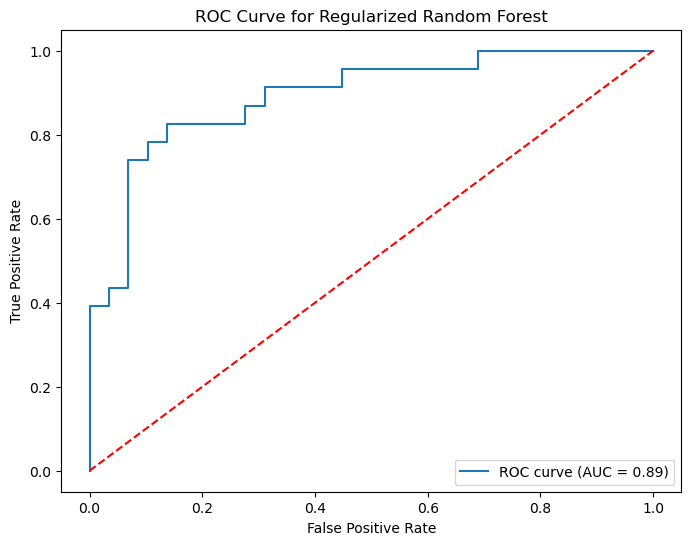

In [3090]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest model with regularization
rf_model_reg = RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=2)

# Train the model on the training data
rf_model_reg.fit(x_train, y_train)

# Predict probabilities on the test data
y_pred_prob_reg = rf_model_reg.predict_proba(x_test)[:, 1]

# Calculate the accuracy, precision, recall, and F1 score
accuracy_reg = rf_model_reg.score(x_test, y_test)
precision_reg = precision_score(y_test, rf_model_reg.predict(x_test))
recall_reg = recall_score(y_test, rf_model_reg.predict(x_test))
f1_reg = f1_score(y_test, rf_model_reg.predict(x_test))

# Print the evaluation metrics
print(f"Accuracy: {accuracy_reg:.4f}")
print(f"Precision: {precision_reg:.4f}")
print(f"Recall: {recall_reg:.4f}")
print(f"F1 Score: {f1_reg:.4f}")

# Calculate the ROC curve and AUC
fpr_reg, tpr_reg, thresholds_reg = roc_curve(y_test, y_pred_prob_reg)
roc_auc_reg = auc(fpr_reg, tpr_reg)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_reg, tpr_reg, label=f'ROC curve (AUC = {roc_auc_reg:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Regularized Random Forest')
plt.legend(loc='lower right')
plt.show()

# Insight - Random Forest Model Accuracy
### --- Random Forest Model - 82%
### --- Hyper parameter tuning - 84%
### --- Data Augmentation
#### --- SMOTE for Over Sampling - 86%
#### --- SMOTE for Under Sampling - 84%
### --- Feature Engineering - 86%
### --- Ensemble techniques 
## ---- Stacking - 92%
#### ---- Blending - 90%
#### ---- Boosting - 76%
### --- Regularisation - 84%
### --- Cross Validation - 77%


## Overall in Random Forest, Best accuracy after applying all the techniques is 92%

# K Nearest Neighbors (KNN)


In [3118]:
# Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [3120]:
# Initialize and train the model
# Split the preprocessed data if not already done
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(x_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(x_test)
y_prob = knn_model.predict_proba(x_test)[:, 1]

In [3122]:
# Evaluate the KNN Model
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8462
Precision: 0.8261
Recall: 0.8261
F1 Score: 0.8261


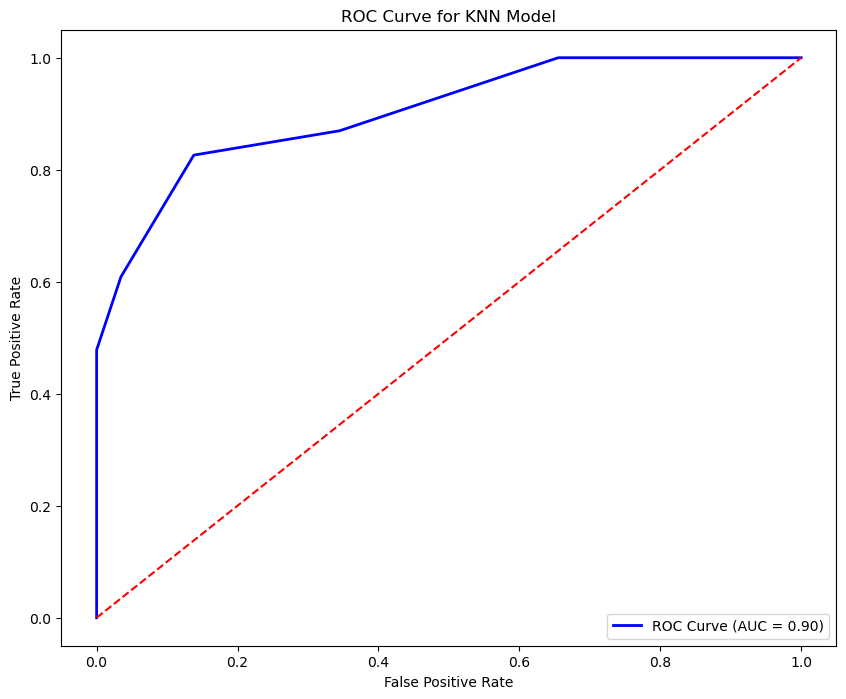

In [3124]:
# Plot the ROC and AUC Curve
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model')
plt.legend(loc='lower right')
plt.show()

## Feature Scaling - KNN

In [3127]:
# standardization: This method centers the data by subtracting the mean and scales it by dividing by the standard deviation.
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [3129]:
# train the model
# Initialize the KNN model with the best value of k (let's assume it's 5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on scaled data
knn_model.fit(x_train_scaled, y_train)

# Predict on the test data
y_pred = knn_model.predict(x_test_scaled)

In [3131]:
# evaluate the model
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9038
Precision: 0.9091
Recall: 0.8696
F1 Score: 0.8889


AUC: 0.9108


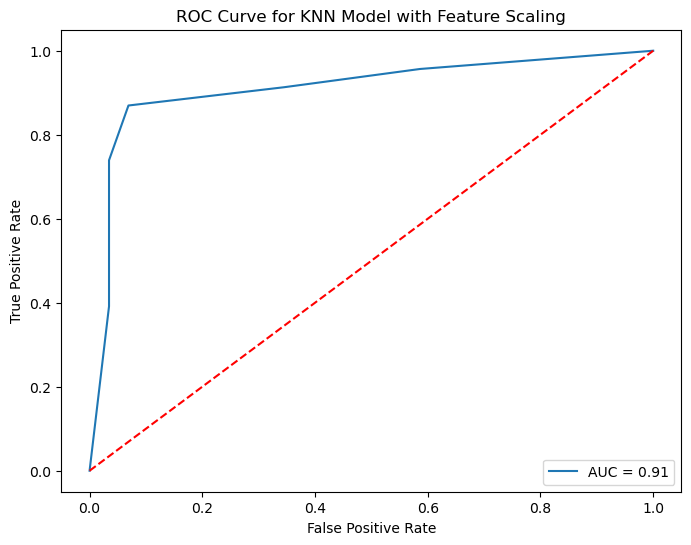

In [3133]:
# Plot ROC and AUC
# Get the probabilities of the positive class
y_prob = knn_model.predict_proba(x_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model with Feature Scaling')
plt.legend(loc='lower right')
plt.show()

## Tune the No. of Neighbors - KNN

In [3136]:
# Import Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3138]:
# define parameter grid
# Define the parameter grid for k
param_grid = {'n_neighbors': list(range(1, 31))}  # Testing k values from 1 to 30

In [3140]:
# Initialize gridsearch cv
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data (scaled)
grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [3141]:
# Find the best K and train the model
# Get the best parameters and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train the KNN model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(x_train_scaled, y_train)

# Predict on the test data
y_pred = knn_best.predict(x_test_scaled)

Best k: 23
Best Cross-Validation Accuracy: 0.8083


In [3144]:
# Evaluate the model
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8462
Precision: 0.8947
Recall: 0.7391
F1 Score: 0.8095


AUC: 0.9355


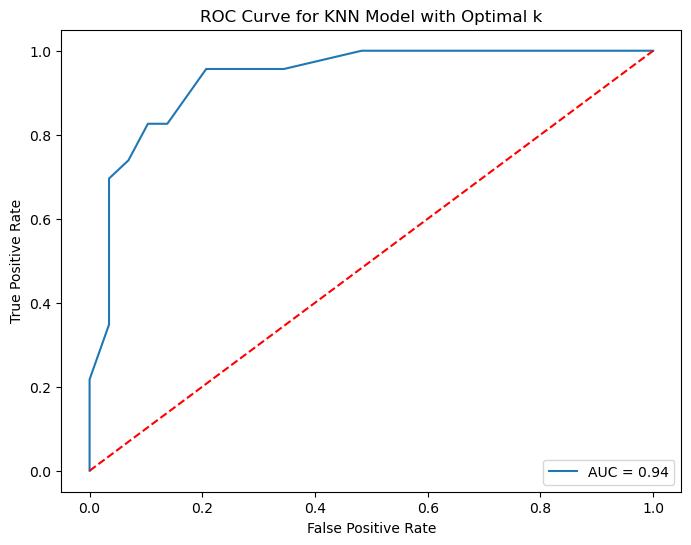

In [3146]:
# plot ROC and AUC
# Get the probabilities of the positive class
y_prob = knn_best.predict_proba(x_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model with Optimal k')
plt.legend(loc='lower right')
plt.show()

## Distance Matrix - KNN

####  determines the most effective distance metric for your KNN model, potentially improving its accuracy and generalization ability.


### ('euclidean', 'manhattan', 'minkowski')

In [3149]:
# import Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3151]:
# Define the parameter grid for k and metrics
param_grid = {
    'n_neighbors': list(range(1, 31)),  # Testing k values from 1 to 30
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Parameter for Minkowski distance (p=1 is Manhattan, p=2 is Euclidean)
}

In [3153]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data (scaled)
grid_search.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': [1, 2]},
             scoring='accuracy', verbose=1)

In [3155]:
# find best fit and train the model
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

# Train the KNN model with the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'], p=best_params.get('p', 2))
knn_best.fit(x_train_scaled, y_train)

# Predict on the test data
y_pred = knn_best.predict(x_test_scaled)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1}
Best Cross-Validation Accuracy: 0.8417


In [3157]:
# evaluate the model
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8654
Precision: 0.8636
Recall: 0.8261
F1 Score: 0.8444


AUC: 0.9438


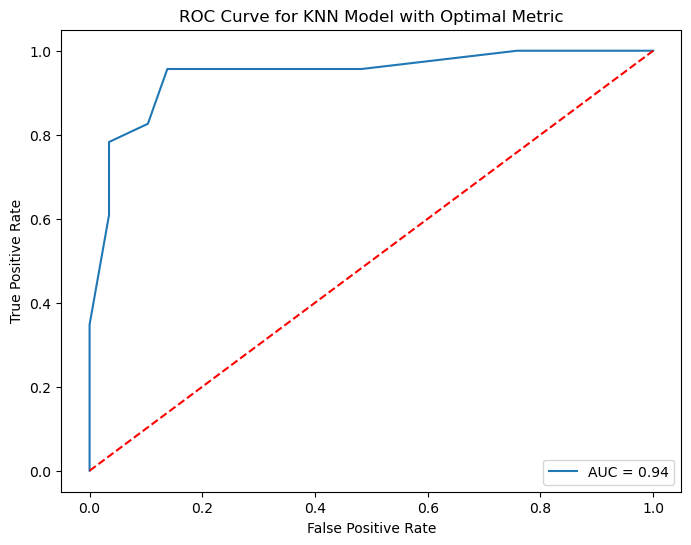

In [3159]:
# plot ROC and AUC
# Get the probabilities of the positive class
y_prob = knn_best.predict_proba(x_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model with Optimal Metric')
plt.legend(loc='lower right')
plt.show()

## Weighted Voting - KNN

#### By assigning weights to neighbors based on their distance, closer neighbors have a greater influence on the prediction, potentially improving the model's performance.

In [3162]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3164]:
# Initialize the KNN model with distance-based weighting
knn_weighted = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                    metric=best_params['metric'], 
                                    p=best_params.get('p', 2), 
                                    weights='distance')

# Train the model on the training data
knn_weighted.fit(x_train_scaled, y_train)

# Predict on the test data
y_pred_weighted = knn_weighted.predict(x_test_scaled)

In [3166]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

print(f"Weighted KNN Accuracy: {accuracy_weighted:.4f}")
print(f"Weighted KNN Precision: {precision_weighted:.4f}")
print(f"Weighted KNN Recall: {recall_weighted:.4f}")
print(f"Weighted KNN F1 Score: {f1_weighted:.4f}")

Weighted KNN Accuracy: 0.8654
Weighted KNN Precision: 0.8636
Weighted KNN Recall: 0.8261
Weighted KNN F1 Score: 0.8444


Weighted KNN AUC: 0.9430


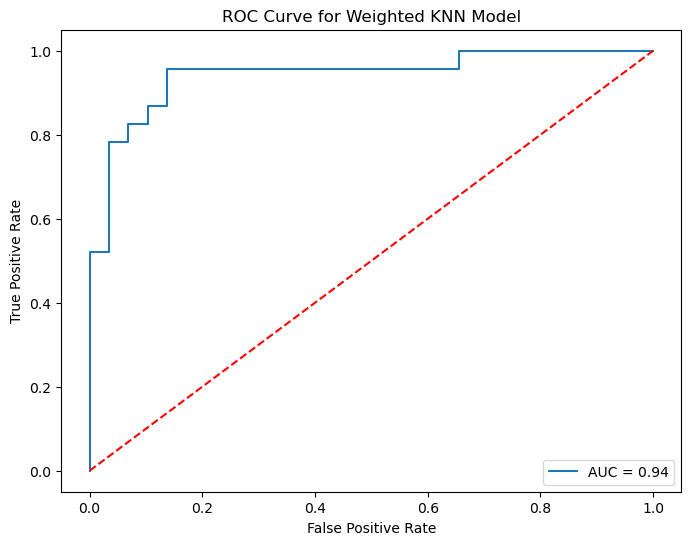

In [3168]:
# Get the probabilities of the positive class
y_prob_weighted = knn_weighted.predict_proba(x_test_scaled)[:, 1]

# Calculate the ROC curve
fpr_weighted, tpr_weighted, thresholds_weighted = roc_curve(y_test, y_prob_weighted)

# Calculate the AUC
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)
print(f"Weighted KNN AUC: {roc_auc_weighted:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f'AUC = {roc_auc_weighted:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Weighted KNN Model')
plt.legend(loc='lower right')
plt.show()

## Dimensionality Reduction - KNN

#### PCA reduces the number of features while retaining most of the data variance, which can improve the performance of the KNN model by addressing the "curse of dimensionality."

In [3171]:
# import libraries
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3173]:
# apply PCA and train the model
# Initialize PCA with a target number of components
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Create a pipeline that first scales data, then applies PCA, and finally trains the KNN model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('knn', KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                 metric=best_params['metric'], 
                                 p=best_params.get('p', 2), 
                                 weights='distance'))
])

# Train the model using the pipeline
pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred_pca = pipeline.predict(x_test)

In [3175]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)

print(f"KNN with PCA Accuracy: {accuracy_pca:.4f}")
print(f"KNN with PCA Precision: {precision_pca:.4f}")
print(f"KNN with PCA Recall: {recall_pca:.4f}")
print(f"KNN with PCA F1 Score: {f1_pca:.4f}")

KNN with PCA Accuracy: 0.8846
KNN with PCA Precision: 0.9048
KNN with PCA Recall: 0.8261
KNN with PCA F1 Score: 0.8636


KNN with PCA AUC: 0.9430


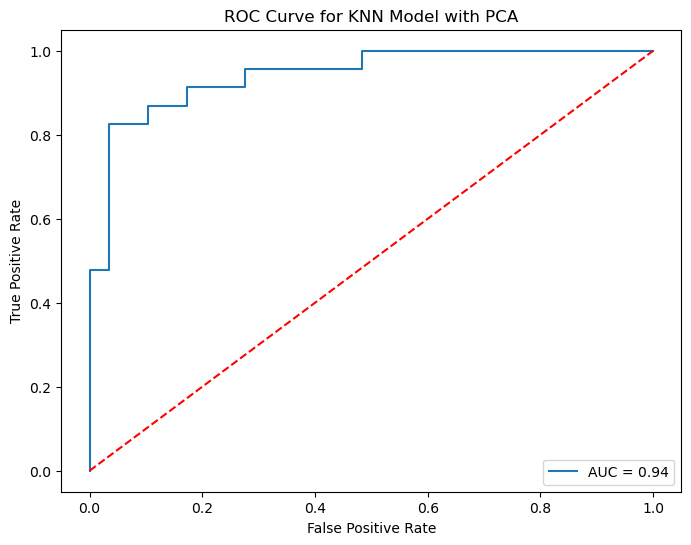

In [3177]:
# Get the probabilities of the positive class
y_prob_pca = pipeline.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_pca, tpr_pca, thresholds_pca = roc_curve(y_test, y_prob_pca)

# Calculate the AUC
roc_auc_pca = auc(fpr_pca, tpr_pca)
print(f"KNN with PCA AUC: {roc_auc_pca:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, label=f'AUC = {roc_auc_pca:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model with PCA')
plt.legend(loc='lower right')
plt.show()

## Ensemble Methods - KNN

### Bagging with KNN
#### Combines multiple KNN models to reduce variance and improve generalization.

In [3182]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the BaggingClassifier with KNN as the base model
bagging_knn = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                        metric=best_params['metric'], 
                                        p=best_params.get('p', 2), 
                                        weights='distance'),
    n_estimators=50,  # Number of KNN models to train
    random_state=2
)

# Train the Bagging model
bagging_knn.fit(x_train, y_train)

# Predict on the test data
y_pred_bagging = bagging_knn.predict(x_test)

In [3184]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging)
recall_bagging = recall_score(y_test, y_pred_bagging)
f1_bagging = f1_score(y_test, y_pred_bagging)

print(f"Bagging with KNN Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging with KNN Precision: {precision_bagging:.4f}")
print(f"Bagging with KNN Recall: {recall_bagging:.4f}")
print(f"Bagging with KNN F1 Score: {f1_bagging:.4f}")

Bagging with KNN Accuracy: 0.8462
Bagging with KNN Precision: 0.8571
Bagging with KNN Recall: 0.7826
Bagging with KNN F1 Score: 0.8182


Bagging with KNN AUC: 0.9355


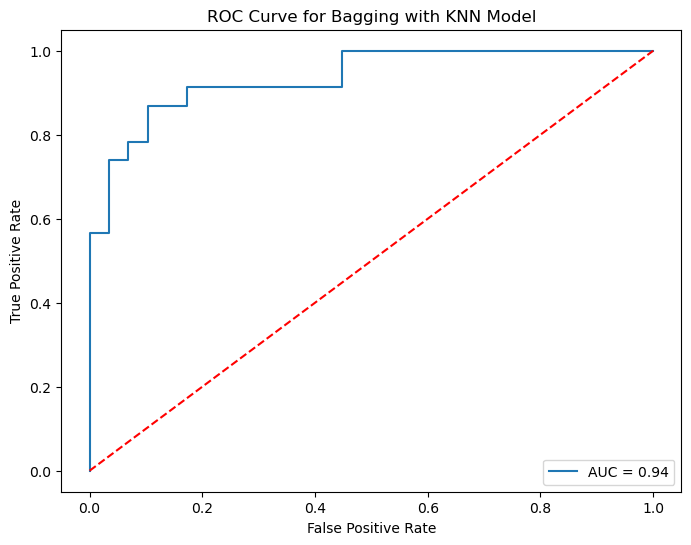

In [3186]:
# Get the probabilities of the positive class
y_prob_bagging = bagging_knn.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_bagging, tpr_bagging, thresholds_bagging = roc_curve(y_test, y_prob_bagging)

# Calculate the AUC
roc_auc_bagging = auc(fpr_bagging, tpr_bagging)
print(f"Bagging with KNN AUC: {roc_auc_bagging:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging, tpr_bagging, label=f'AUC = {roc_auc_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging with KNN Model')
plt.legend(loc='lower right')
plt.show()

### Stacking with KNN

#### Leverages the strengths of different models (KNN, Logistic Regression, SVM) to build a more robust model.

In [3189]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the base models
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                 metric=best_params['metric'], 
                                 p=best_params.get('p', 2), 
                                 weights='distance')),
    ('logistic', LogisticRegression(max_iter=1000, random_state=2)),
    ('svm', SVC(probability=True, random_state=2))
]

# Initialize the StackingClassifier with Logistic Regression as the meta-learner
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=2),
    cv=5
)

# Train the Stacking model
stacking_model.fit(x_train, y_train)

# Predict on the test data
y_pred_stacking = stacking_model.predict(x_test)

In [3191]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)

print(f"Stacking with KNN Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking with KNN Precision: {precision_stacking:.4f}")
print(f"Stacking with KNN Recall: {recall_stacking:.4f}")
print(f"Stacking with KNN F1 Score: {f1_stacking:.4f}")

Stacking with KNN Accuracy: 0.9038
Stacking with KNN Precision: 0.9091
Stacking with KNN Recall: 0.8696
Stacking with KNN F1 Score: 0.8889


Stacking with KNN AUC: 0.9520


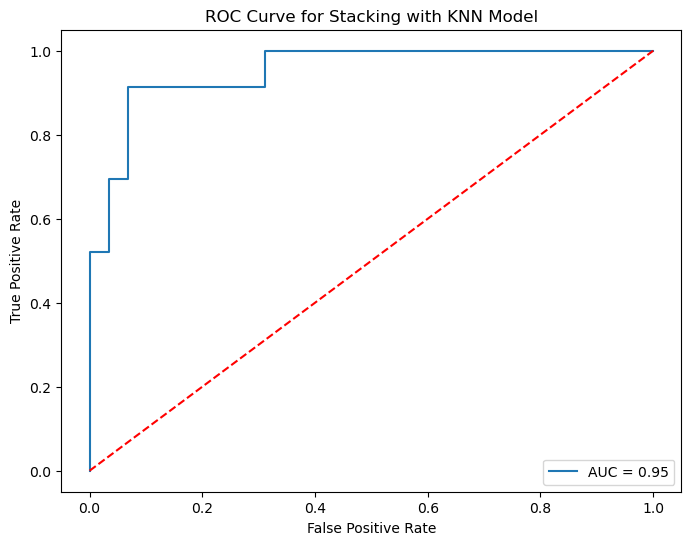

In [3193]:
# Get the probabilities of the positive class
y_prob_stacking = stacking_model.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_prob_stacking)

# Calculate the AUC
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
print(f"Stacking with KNN AUC: {roc_auc_stacking:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_stacking, tpr_stacking, label=f'AUC = {roc_auc_stacking:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking with KNN Model')
plt.legend(loc='lower right')
plt.show()

## Cross Validation - KNN

#### performed 5-fold cross-validation to ensure that the model's performance metrics (accuracy, precision, recall, F1-score) are consistent across different subsets of the data.

In [3196]:
# import libraries
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Initialize KFold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

In [3198]:
# Perform cross-validation and get the predicted probabilities
y_prob_cv = cross_val_predict(KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                                   metric=best_params['metric'], 
                                                   p=best_params.get('p', 2), 
                                                   weights='distance'), 
                              x, y, cv=kf, method='predict_proba')

# Get the predicted labels
y_pred_cv = (y_prob_cv[:, 1] > 0.5).astype(int)

In [3200]:
# Calculate accuracy, precision, recall, and F1-score
accuracy_cv = accuracy_score(y, y_pred_cv)
precision_cv = precision_score(y, y_pred_cv)
recall_cv = recall_score(y, y_pred_cv)
f1_cv = f1_score(y, y_pred_cv)

print(f"Cross-Validation Accuracy: {accuracy_cv:.4f}")
print(f"Cross-Validation Precision: {precision_cv:.4f}")
print(f"Cross-Validation Recall: {recall_cv:.4f}")
print(f"Cross-Validation F1 Score: {f1_cv:.4f}")

Cross-Validation Accuracy: 0.8547
Cross-Validation Precision: 0.9180
Cross-Validation Recall: 0.7368
Cross-Validation F1 Score: 0.8175


Cross-Validation AUC: 0.8919


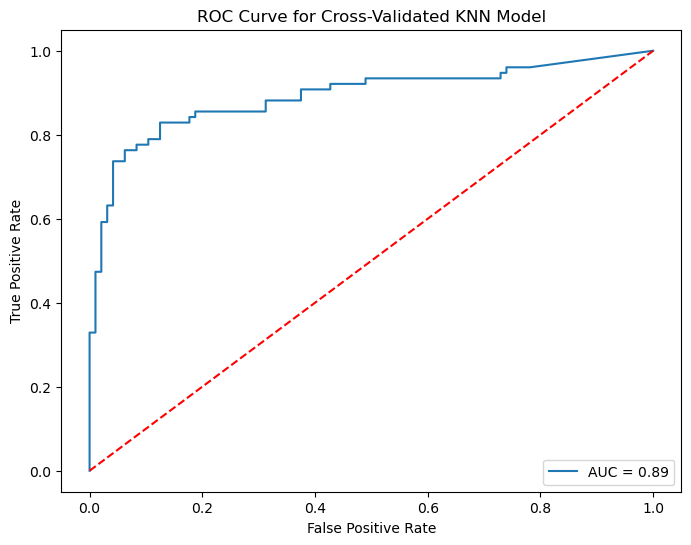

In [3202]:
# Calculate the ROC curve
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y, y_prob_cv[:, 1])

# Calculate the AUC
roc_auc_cv = auc(fpr_cv, tpr_cv)
print(f"Cross-Validation AUC: {roc_auc_cv:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, label=f'AUC = {roc_auc_cv:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cross-Validated KNN Model')
plt.legend(loc='lower right')
plt.show()

## Handling Imbalanced Data - KNN

#### We applied SMOTE to oversample the minority class, making the dataset more balanced.

In [3205]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3207]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=2)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [3209]:
# Splitting the resampled data
x_train_resampled, x_test_resampled, y_train_resampled, y_test_resampled = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=2)

In [3211]:
# Initialize KNN with the best parameters found previously (or defaults)
knn_model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                 metric=best_params['metric'], 
                                 p=best_params.get('p', 2), 
                                 weights='distance')

# Train the model
knn_model.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1, weights='distance')

In [3213]:
# Predict on the test data
y_pred_resampled = knn_model.predict(x_test_resampled)
y_prob_resampled = knn_model.predict_proba(x_test_resampled)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
f1_resampled = f1_score(y_test_resampled, y_pred_resampled)

print(f"Accuracy after SMOTE: {accuracy_resampled:.4f}")
print(f"Precision after SMOTE: {precision_resampled:.4f}")
print(f"Recall after SMOTE: {recall_resampled:.4f}")
print(f"F1 Score after SMOTE: {f1_resampled:.4f}")

Accuracy after SMOTE: 0.8966
Precision after SMOTE: 0.8438
Recall after SMOTE: 0.9643
F1 Score after SMOTE: 0.9000


AUC after SMOTE: 0.9738


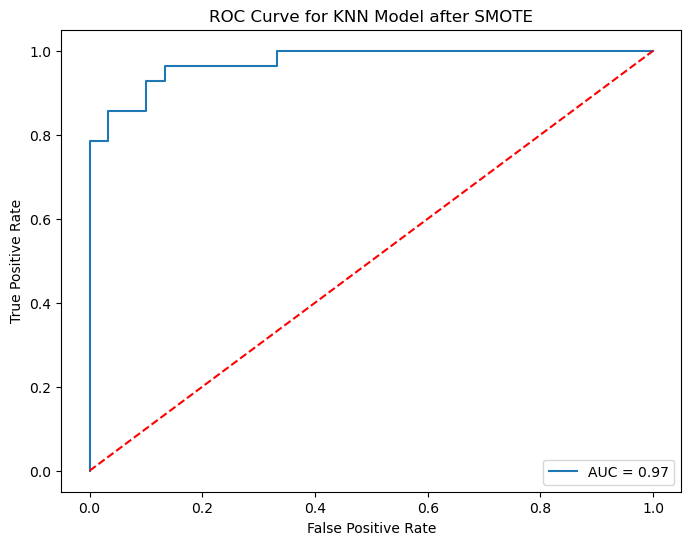

In [3215]:
# Calculate the ROC curve
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test_resampled, y_prob_resampled)

# Calculate the AUC
roc_auc_resampled = auc(fpr_resampled, tpr_resampled)
print(f"AUC after SMOTE: {roc_auc_resampled:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, label=f'AUC = {roc_auc_resampled:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Model after SMOTE')
plt.legend(loc='lower right')
plt.show()

# Insight - KNN Model Accuracy
### --- KNN Model - 84%
## --- Feature Scaling - 90%
### --- Tune the No. of Neighbors - 84%
### --- Distance Matrix - 86%
### --- Ensemble techniques 
### ---- Bagging with KNN - 84%
## ---- Stacking with KNN - 90%
### --- Weighted Voting - 86%
### --- Dimensionality Reduction - 88%
### --- Cross Validation - 85%
### --- Handling imbalanced data - 89%


## Overall in KNN Best accuracy after applying all the techniques is 90%

# Gradient Boost

In [3232]:
# Import libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3234]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=2)

# Train the model on the training data
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=2)

In [3236]:
# Predict on the test data
y_pred_gb = gb_model.predict(x_test)
y_prob_gb = gb_model.predict_proba(x_test)[:, 1]

# Calculate accuracy, precision, recall, and F1-score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")

Accuracy: 0.7692
Precision: 0.7391
Recall: 0.7391
F1 Score: 0.7391


AUC: 0.8666


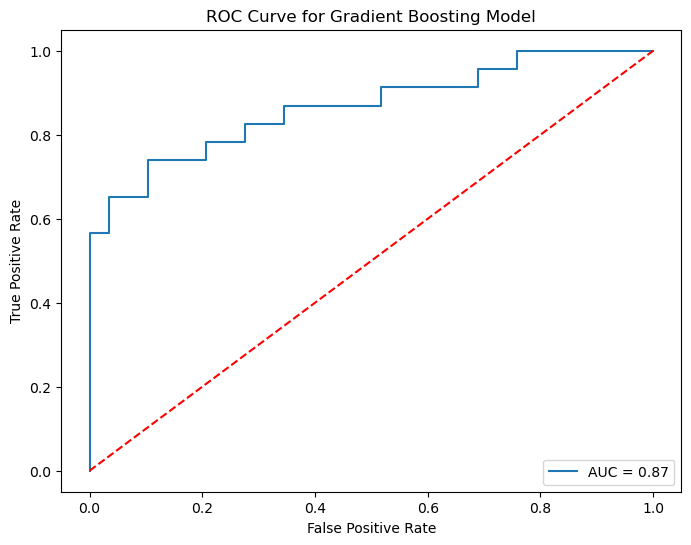

In [3238]:
# Calculate the ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)

# Calculate the AUC
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(f"AUC: {roc_auc_gb:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Model')
plt.legend(loc='lower right')
plt.show()

## Hyper Parameter Tuning - Gradient Boost

In [3241]:
# Import Libraries
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3245]:
# Split the preprocessed data if not already done
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [3247]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.7, 0.8, 0.9],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [3249]:
gb_model = GradientBoostingClassifier(random_state=2)

In [3253]:
# setup the grid search 
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=2),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc', verbose=2)

In [3259]:
# Evaluate the model
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)
y_pred_proba = best_model.predict_proba(x_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])

print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.7885
Precision: 0.7500
Recall: 0.7826
F1 Score: 0.7660
ROC AUC: 0.8981


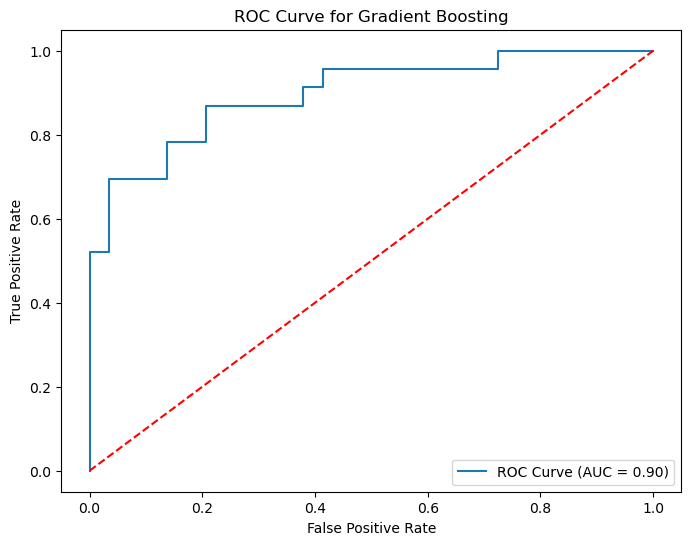

In [3261]:
# plot ROC and AUC
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

## Feature Engineering - Gradient Boost

In [3264]:
# Feature Selection 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(x_train, y_train)

# Use feature importances from the model for feature selection
model = SelectFromModel(gb_model, prefit=True)
x_train_selected = model.transform(x_train)
x_test_selected = model.transform(x_test)

print(f"Original number of features: {x_train.shape[1]}")
print(f"Reduced number of features: {x_train_selected.shape[1]}")

Original number of features: 14
Reduced number of features: 4


In [3268]:
# Interaction features - Creating interaction features can help the model capture complex relationships that aren't apparent with individual features.
from sklearn.preprocessing import PolynomialFeatures

# Create interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_interactions = poly.fit_transform(x_train_selected)
x_test_interactions = poly.transform(x_test_selected)

print(f"Number of features after adding interaction features: {x_train_interactions.shape[1]}")

Number of features after adding interaction features: 10


In [3270]:
# Polynomial features - Applying polynomial transformations can help the model capture non-linear relationships in the data.
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train_interactions)
x_test_poly = poly.transform(x_test_interactions)

print(f"Number of features after adding polynomial features: {x_train_poly.shape[1]}")

Number of features after adding polynomial features: 65


In [3272]:
# Initialize and train the Gradient Boosting model with the engineered features
gb_model = GradientBoostingClassifier(random_state=2)
gb_model.fit(x_train_poly, y_train)

# Predict on the test set
y_pred = gb_model.predict(x_test_poly)
y_pred_proba = gb_model.predict_proba(x_test_poly)[:, 1]

In [3274]:
# evaluate the model
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.6538
Precision: 0.6000
Recall: 0.6522
F1 Score: 0.6250
ROC AUC: 0.7121


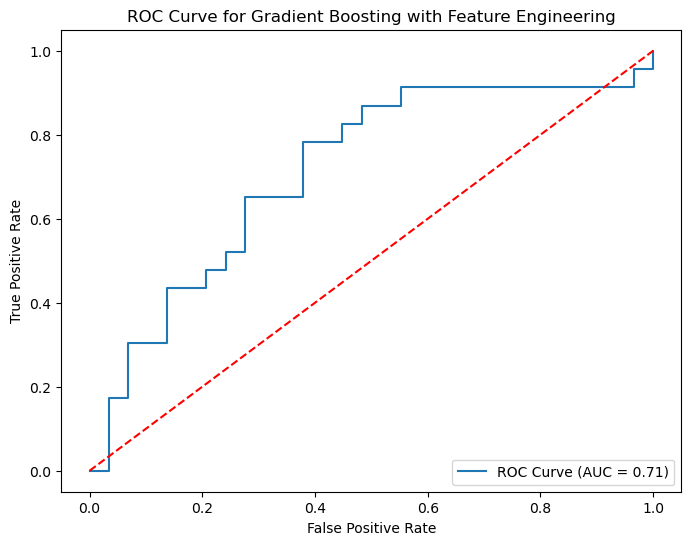

In [3276]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting with Feature Engineering')
plt.legend(loc='lower right')
plt.show()

# Insight - Gradient Boost Accuracy
### --- Gradient Boost model - 76%
## --- Hyper Parameter tuning - 78%
### --- Feauture Engineering - 65%

## Overall in Gradient Boost accuracy after applying all the techniques is 78%

# Project Report - Highest Accuracy

### Logistic Regression - 75%
### Decision Tree - Applying Random Forest - 86%
## Support Vector Machine - Applying Bagging from Ensemble techniques - 92%
## Random Forest - Applying Stacking from Ensemble Techniques - 92%
### K Nearest Neighbor - Applying Feature Scaling - 90%
### Gradient Boost - Applying Hyper parameter tuning - 78%

# Insight - Highest accuracy is achieved with SVM and Random forest which is 92%

# Task3 - Suggestions to the Hospital to awake the predictions of heart diseases prevent life threats.

1. Regular Screening Programs: Implement routine health checkups, focusing on high-risk groups such as those with a history of heart disease, diabetes, and hypertension.

2. Enhanced Data Integration: Integrate comprehensive patient data, including electronic health records and wearable device data, for better predictive insights.

3. Advanced Predictive Analytics: Utilize machine learning models to predict heart disease risk and deploy real-time alert systems for early intervention.

4. Patient Education: Conduct awareness campaigns and provide personalized health plans to educate and engage patients in managing heart disease risk factors.

5. Collaborative Care: Establish multidisciplinary teams for comprehensive, patient-centered care, involving cardiologists, nutritionists, and mental health professionals.

6. Telemedicine and Follow-Up: Use telemedicine for regular follow-ups and monitor high-risk patients continuously to adjust treatment plans as needed.

7. Data-Driven Decisions: Implement a data analytics dashboard to monitor key health metrics and integrate predictive analytics into clinical decision-making.

8. Community Outreach: Organize workshops and mobile health units for heart disease prevention, focusing on lifestyle changes and education in underserved areas.

9. Lifestyle Modification Programs: Offer hospital-based programs promoting heart-healthy diets, regular physical activity, and smoking cessation.

10. AI-Powered Personalized Medicine: Leverage AI to stratify patients by risk level and provide tailored interventions, enhancing the precision of care.

